#  BUILD A MODEL TO PREDICT PERFORMANCE OF EMPLOYEES,BASED ON THE VISUALISATION AND ANALYSIS OF PAST DATA OF EMPLOYEES PERFORMANCE.

# 1. Importing Necessary Modules

In [335]:
#  BASIC LIBRARIES
import numpy as np              # For numerical operations and array manipulation
import pandas as pd             # For data manipulation and analysis with DataFrame structures

#  DATA VISUALIZATION
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns           # For statistical data visualization based on matplotlib

#  DATA PREPROCESSING
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler      # For standardizing features (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler        # For scaling features to a specific range (typically [0,1])
from sklearn.preprocessing import RobustScaler        # For scaling features robust to outliers
from sklearn.preprocessing import MaxAbsScaler        # For scaling by maximum absolute value

#  MACHINE LEARNING MODELS
from xgboost import XGBClassifier       # Gradient boosting implementation optimized for speed and performance
from catboost import CatBoostClassifier # Gradient boosting with better handling of categorical features
from lightgbm import LGBMClassifier     # Light Gradient Boosting Machine, faster implementation of gradient boosting

# MODEL EVALUATION
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model performance metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score  # For ROC curve analysis and AUC calculation
from sklearn.metrics import ConfusionMatrixDisplay         # For visualizing confusion matrices
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
# Suppress warning messages to keep output clean
import warnings
warnings.filterwarnings("ignore")  # Ignores all warning messages during execution

In [188]:
# Read the 'Leads.csv' file into a pandas DataFrame named 'data'
data=pd.read_csv('Test_data.csv')

# Exploratory Data Analysis 

## 1. Data Preprocessing

### (A) Data Understading

In [193]:
# Display the first 5 rows of the dataframe to get a quick overview of the data structure
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [194]:
# Get the dimensions of the 'data' DataFrame or array
# Returns a tuple representing (rows, columns)
data.shape

(23490, 13)

In [195]:
# Get the total number of elements in the 'data' array/DataFrame
# This returns the product of the lengths of all axes (rows × columns)
data.size

305370

In [198]:
# Display concise summary of the DataFrame 'data'
# Shows information about index dtype and column dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [200]:
# Generate descriptive statistics for the DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [201]:
# Check the data types of each column in the DataFrame
# This helps understand what kind of data we're working with (numeric, categorical, etc.)
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [203]:
# Display all column names in the DataFrame 'data'
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [206]:
# Calculate the percentage of missing values in each column
# 1. data.isna() creates a boolean mask where True indicates missing values
# 2. .mean() calculates the proportion of missing values (True values) in each column
# 3. Multiply by 100 to convert to percentage
data.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64


- Most columns have 0% missing values, meaning they are complete
- The "education" column has approximately 4.40% missing values
- The "previous_year_rating" column has approximately 7.71% missing values


In [210]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
data.duplicated().sum()

np.int64(0)

# (B) Fixed Rows and Columns 

In [213]:
# Remove the 'employee_id' column from the dataframe as it's not needed for analysis
# axis=1 specifies we're dropping a column (not a row)
# inplace=True means the operation modifies the original dataframe instead of returning a copy
data.drop('employee_id',axis=1,inplace=True)

In [215]:
# Convert all column names to title case (first letter of each word capitalized)
data.columns = data.columns.str.title()

# (C) Handling Missing Values and Drop Duplicates

In [218]:
# Calculate the percentage of missing values for each column
# 1. data.isna() creates a boolean mask where True indicates missing values
# 2. .mean() calculates the proportion of missing values (True = 1, False = 0)
# 3. Multiply by 100 to convert to percentage
data.isna().mean()*100

Department              0.000000
Region                  0.000000
Education               4.401873
Gender                  0.000000
Recruitment_Channel     0.000000
No_Of_Trainings         0.000000
Age                     0.000000
Previous_Year_Rating    7.713921
Length_Of_Service       0.000000
Kpis_Met >80%           0.000000
Awards_Won?             0.000000
Avg_Training_Score      0.000000
dtype: float64


The selected code `data.isna().mean()*100` produced the output you've shared, which shows the percentage of missing values in each column of your DataFrame. 

The results indicate that most columns have no missing values (0.000000%), but two columns do have missing data:
- Education: 4.401873% missing values
- Previous_Year_Rating: 7.713921% missing values

This information is valuable for data preprocessing as it helps you identify which columns need to be handled for missing values before proceeding with analysis or modeling.

In [221]:
# Count the frequency of each unique value in the 'Education' column
# This shows how many records exist for each education level in the dataset
data['Education'].value_counts()

Education
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

In [223]:
# Count the frequency of each unique value in the 'Previous_Year_Rating' column
# This helps understand the distribution of employee ratings from the previous year
data['Previous_Year_Rating'].value_counts()

Previous_Year_Rating
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: count, dtype: int64

In [225]:
# Fill missing values in the 'Education' column with the most frequent value (mode)
# inplace=True modifies the original dataframe without creating a new one
data['Education'].fillna(data['Education'].mode()[0],inplace=True)

In [227]:
# Fill missing values in 'Previous_Year_Rating' column with the median value
# This is a common approach for handling missing numerical data while minimizing the impact of outliers
data['Previous_Year_Rating'].fillna(data['Previous_Year_Rating'].median(),inplace=True)

In [229]:
data['Previous_Year_Rating'] = data['Previous_Year_Rating'].astype(int)

In [231]:
# Calculate the total number of missing values in the entire dataset
# First data.isna() creates a boolean mask of missing values
# Then .sum() counts missing values in each column
# The second .sum() adds up all column totals for a grand total
data.isna().sum().sum()

np.int64(0)

In [233]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
data.duplicated().sum()

np.int64(38)

In [235]:
# Remove duplicate rows from the dataframe to ensure data quality
data=data.drop_duplicates()

In [237]:
# Count the number of duplicate rows in the dataframe
# Returns the sum of True values (where rows are duplicates)
data.duplicated().sum()

np.int64(0)

# (E) Checking Outliers and Reset Index

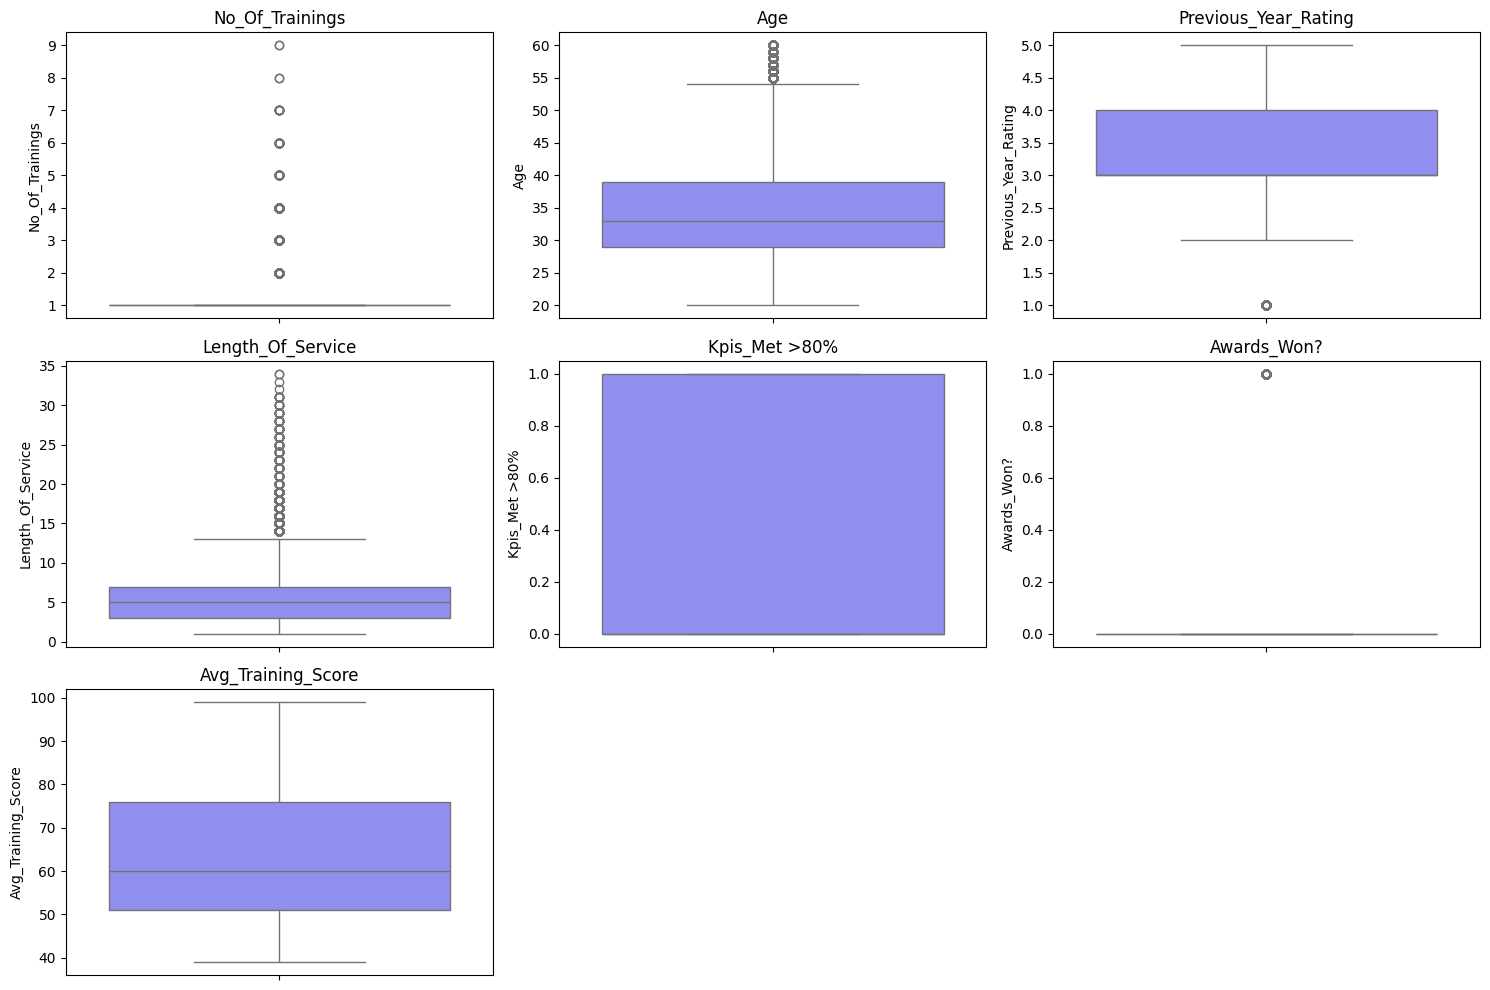

In [240]:
# Boxplot for all integer columns, one at a time
# Get a list of all columns with integer data type
int_cols = data.select_dtypes(int).columns

# Create a figure with appropriate size for multiple subplots
plt.figure(figsize=(15, 10))
# Loop through each integer column with enumeration to track subplot position
for i, col in enumerate(int_cols, 1):
    # Create a subplot in a 3x3 grid at position i
    plt.subplot(3, 3, i)
    # Create a boxplot for the current column using a 'cool' color palette
    sns.boxplot(y=data[col], palette='cool')
    # Add a title to the subplot with the column name
    plt.title(col)
    # Adjust spacing between subplots for better visualization
    plt.tight_layout()


 ### Insights from Numerical Features (Boxplot Analysis)
#### No. of Trainings

- Most employees undergo 1 to 2 training sessions, with a median close to 1.

- There are a few outliers with employees receiving 7+ trainings, possibly indicating special programs or performance issues.

#### Age

- The majority of employees fall in the 30–40 age range.

- The distribution is slightly right-skewed with a few employees older than 50, possibly in managerial positions.

#### Previous Year Rating

- Ratings are mostly centered between 3 and 4, showing that most employees received moderate to high ratings.

- A few low-rated (0–2) outliers exist, indicating potential performance concerns.

#### Length of Service

- Most employees have a service length between 2 and 7 years.

- Several outliers suggest some employees have been with the company for over 15+ years, indicating loyalty or senior roles.

#### KPI Met >80%

- This is a binary feature (0 or 1).

- The boxplot confirms a large portion of employees met their KPIs (value = 1), indicating overall performance consistency.

#### Awards Won?

- Another binary feature with very few employees having won awards.

- This suggests that awards are rare and possibly tied to top performance tiers.

#### Average Training Score

- Scores are mostly between 50 and 75, with a median around 60.

- There are no extreme outliers, showing a fairly tight distribution of training scores across employees.

----

In [242]:
# Reset the DataFrame index after removing duplicates
# drop=True prevents the old index from being added as a column
# inplace=True modifies the DataFrame directly instead of returning a new one
data.reset_index(drop=True, inplace=True)

## Unique value check

In [244]:
# Loop through each column in the dataframe
for col in data.columns:
    # Print the column name and the count of unique values in that column
    # using the nunique() method which returns the number of distinct values
    print(f"{col}: {data[col].nunique()} unique values")

Department: 9 unique values
Region: 34 unique values
Education: 3 unique values
Gender: 2 unique values
Recruitment_Channel: 3 unique values
No_Of_Trainings: 9 unique values
Age: 41 unique values
Previous_Year_Rating: 5 unique values
Length_Of_Service: 34 unique values
Kpis_Met >80%: 2 unique values
Awards_Won?: 2 unique values
Avg_Training_Score: 61 unique values


# 2. Data Visualization

# (A) Univariate Analysis

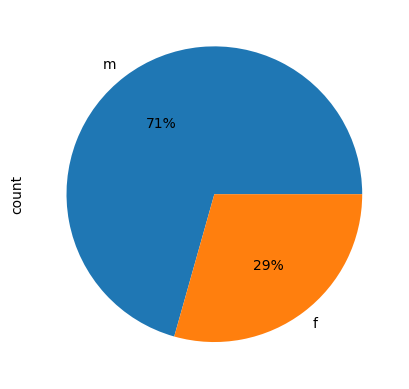

In [247]:
# Calculate the count of each value in the 'Gender' column
# Plot a pie chart showing the distribution of m vs f
# autopct='%.f%%' displays whole number percentages on the chart
data.Gender.value_counts().plot.pie(autopct='%.f%%');

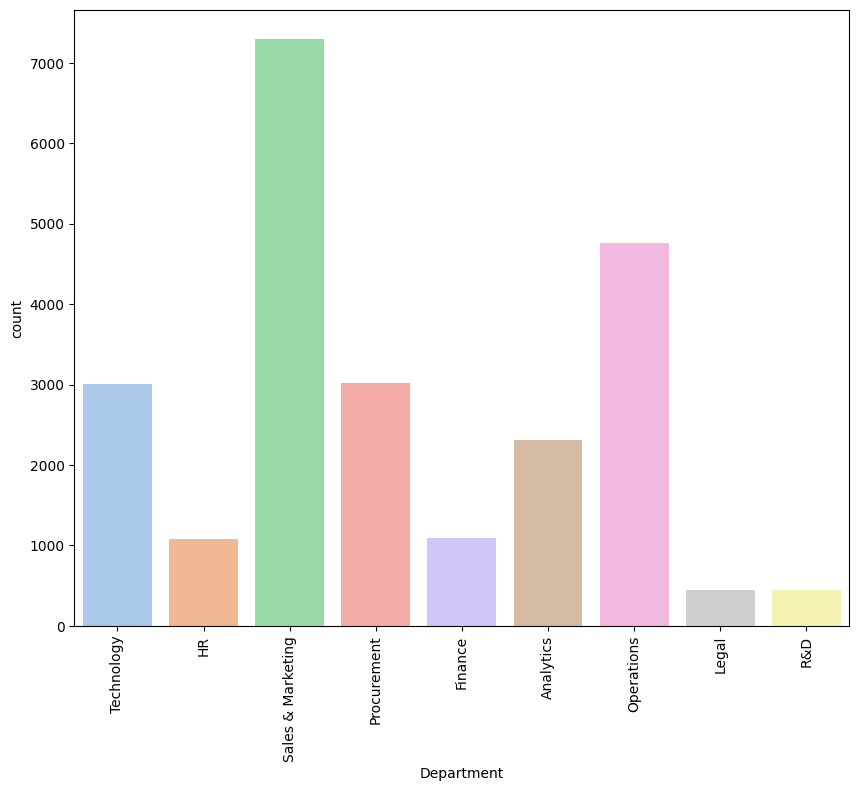

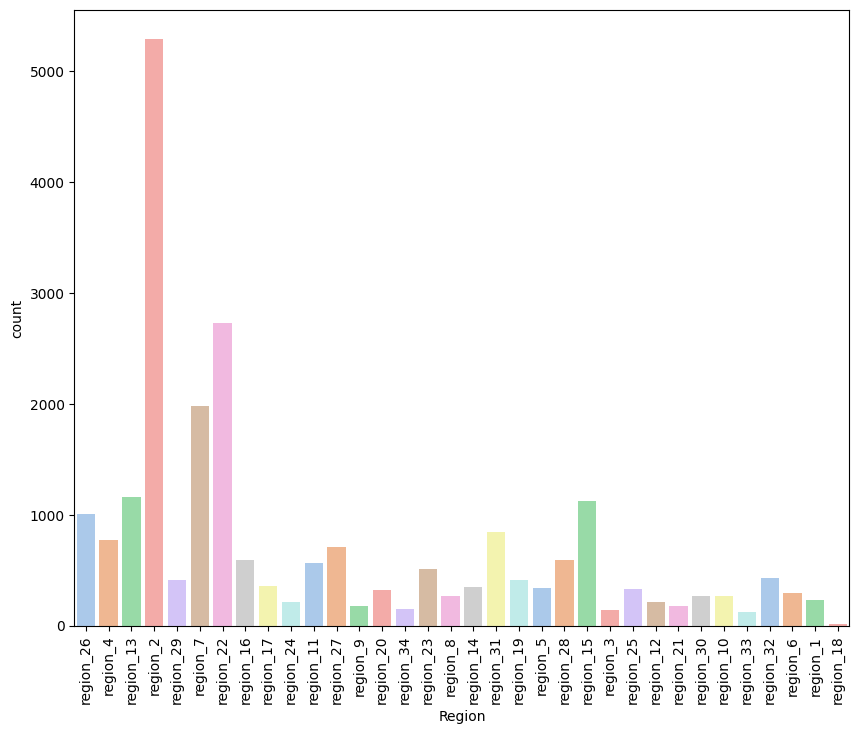

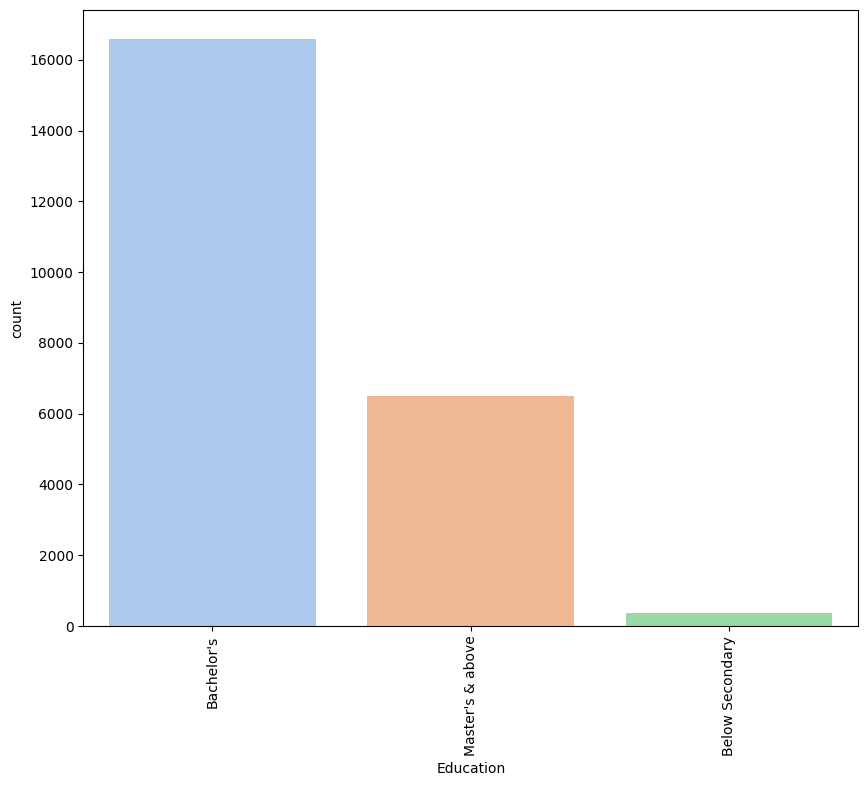

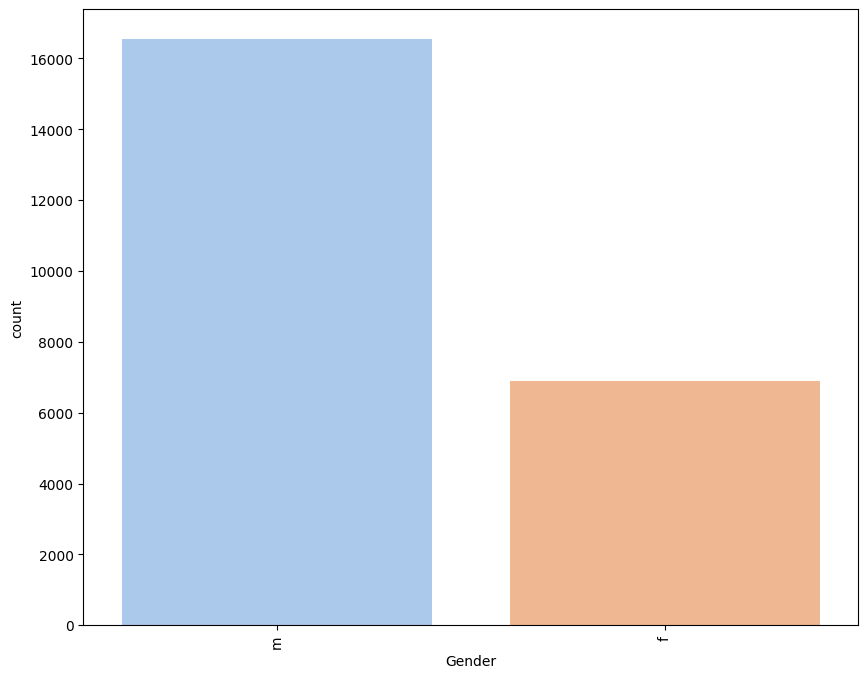

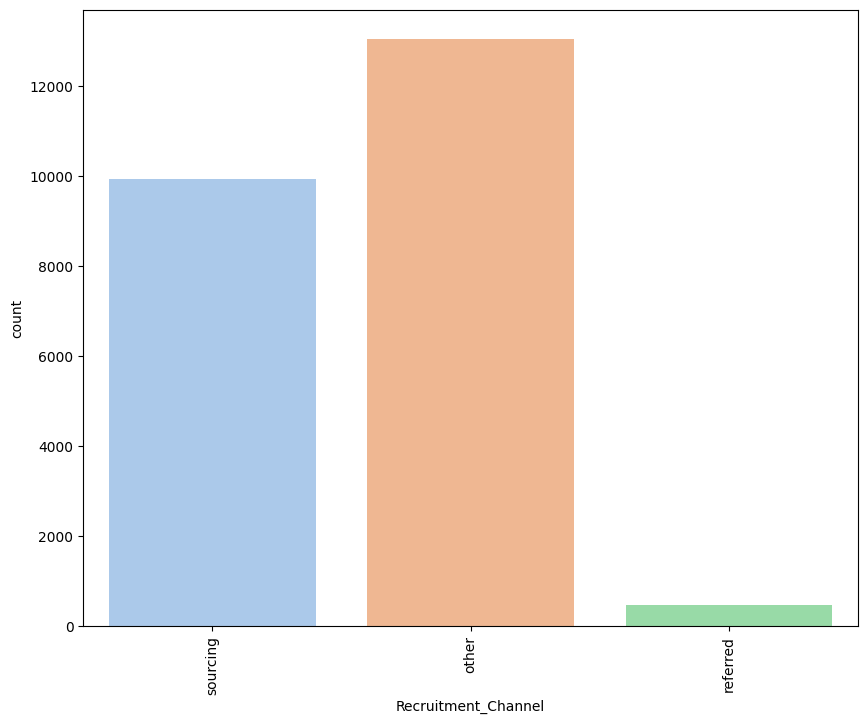

In [248]:
# Plot countplot of all object (categorical) columns in the dataset
for i in data.select_dtypes(object):  # Loop through each column with object datatype
    plt.figure(figsize=(10,8))        # Create a new figure with specified size (10x8 inches)
    sns.countplot(x=data[i],palette='pastel')  # Create a countplot showing frequency of each category with pastel colors
    plt.xticks(rotation=90)           # Rotate x-axis labels by 90 degrees for better readability
    plt.show()                        # Display the current plot before moving to the next column

## Countplot Insights – Categorical Columns

### 🔹 Department
- The workforce is distributed across multiple departments.
- **Sales & Marketing** and **Operations** have the highest employee counts.
- Departments like **Technology** and **Procurement** are mid-sized.
- **Legal**, **R&D**, and similar departments have very few employees.
- → This shows the company is largely driven by sales and operations.

### 🔹 Region
- Regions such as **Region_2**, **Region_22**, and **Region_7** have the highest representation.
- Several regions have very few employees, indicating smaller offices or recent expansions.
- → Region-wise employee concentration can help guide regional strategies.

### 🔹 Education
- Majority of employees have a **Bachelor’s degree**.
- A significant number hold **Master’s & above** qualifications.
- Very few employees are from a **Below Secondary** education background.
- → The company workforce is highly educated.

### 🔹 Gender
- The majority of employees are labeled **"E"** (likely Male), with fewer labeled **"f"** (Female).
- → Indicates a possible **gender imbalance** that could be further analyzed for diversity and inclusion improvements.


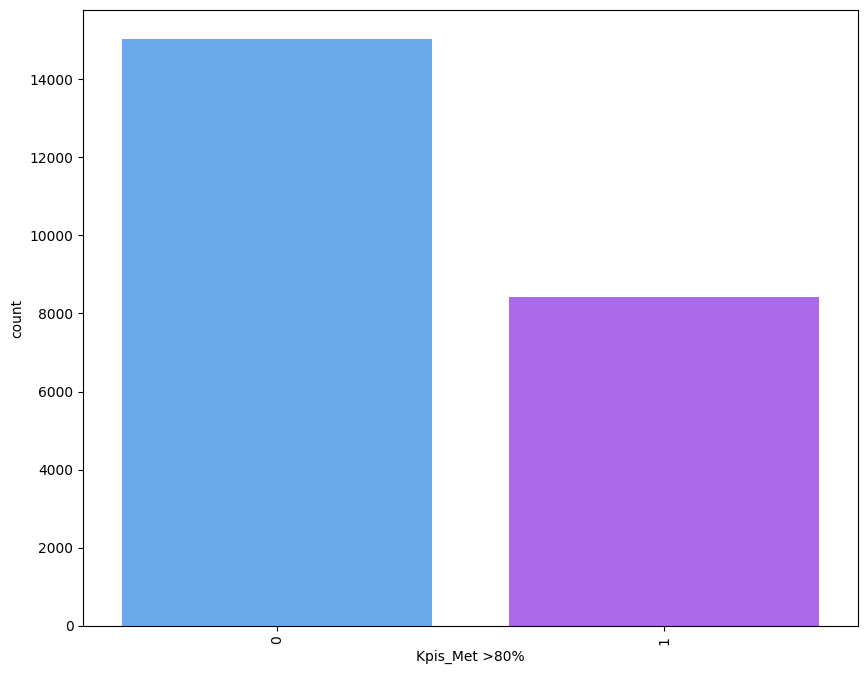

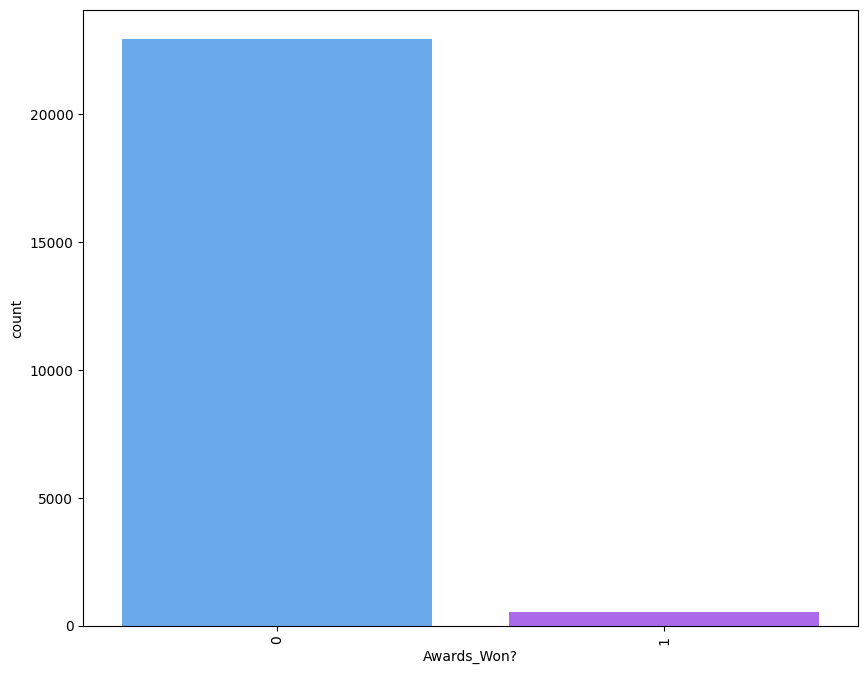

In [250]:
# using count plot for binary colums 'Kpis_Met >80%', 'Awards_Won?'
for i in data[['Kpis_Met >80%', 'Awards_Won?']]:  # Loop through the two binary columns
    plt.figure(figsize=(10,8))  # Create a new figure with specified size
    sns.countplot(x=data[i], palette='cool')  # Create a count plot showing frequency of each value
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
    plt.show()  # Display the current plot before moving to the next iteration

##  Countplot Insights – Binary Columns

### 🔹 KPIs Met >80%
- A large number of employees **did meet their KPIs** (value = 1).
- A smaller but significant group **did not meet the KPI target** (value = 0).
- → This suggests that while a majority are meeting performance expectations, there’s still room for improvement in employee output or goal setting.

### 🔹 Awards Won?
- Most employees **have not won awards** (value = 0).
- Only a very small fraction **has received awards** (value = 1).
- → This indicates that awards are likely reserved for top-tier performers or are highly competitive.


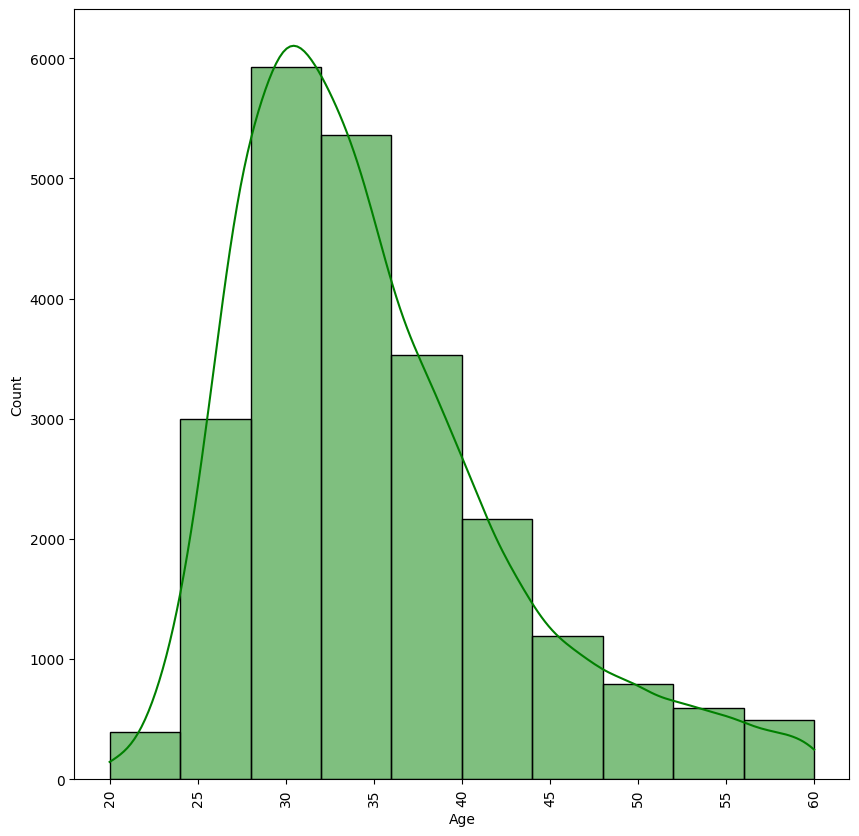

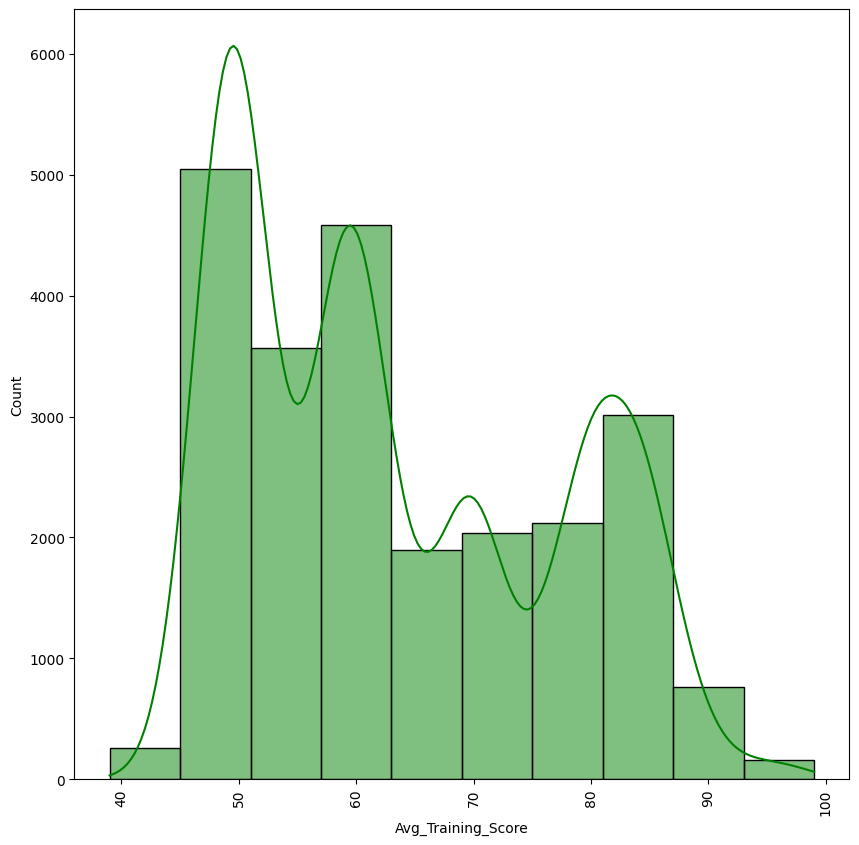

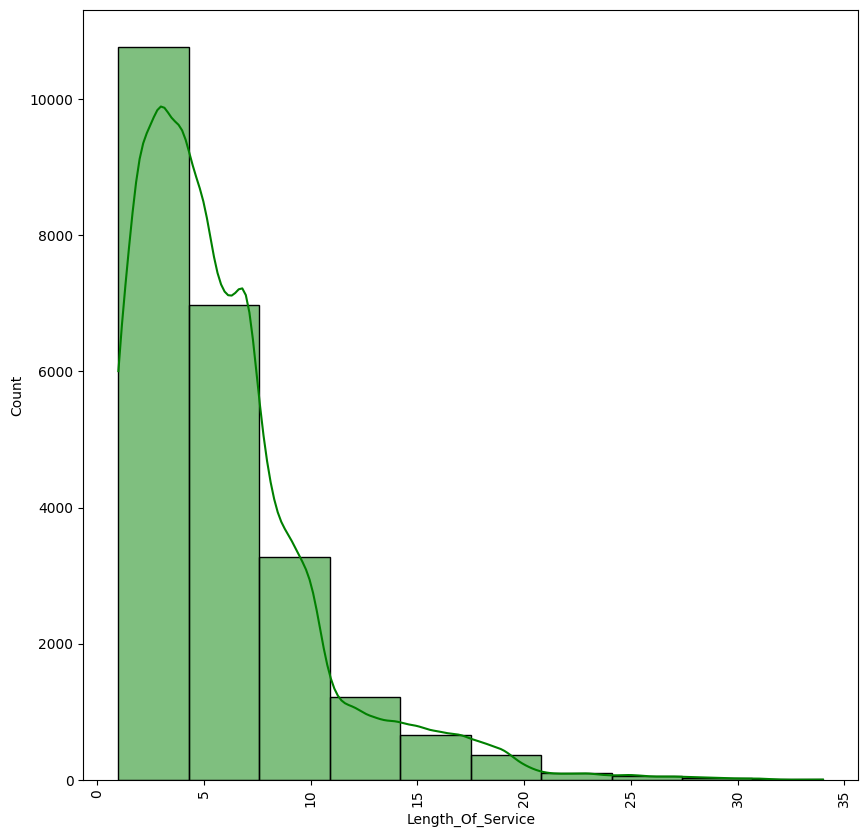

In [252]:
# Loop through each of the specified numerical columns to visualize their distributions
for i in data[['Age','Avg_Training_Score','Length_Of_Service']]:
    # Create a new figure with 10x10 size for each column
    plt.figure(figsize=(10,10))
    # Plot histogram with kernel density estimate (KDE) overlay
    # Using green color, with 10 bins for better visualization
    sns.histplot(x=data[i], color='g', kde=True, bins=10)
    # Rotate x-axis labels by 90 degrees to prevent overlap
    plt.xticks(rotation=90)
    # Display the plot before moving to the next column
    plt.show()

##  Histogram Insights – Distribution of Numerical Features

###  Age
- Most employees fall within the **25 to 40 age group**.
- The distribution is slightly **right-skewed**, indicating fewer older employees.
- → The workforce is predominantly young to mid-career professionals.

### Avg_Training_Score
- The average training scores mostly range between **50 and 80**.
- There are multiple **peaks** in the distribution, suggesting varying training performance clusters.
- → May imply different training programs or performance tiers.

###  Length Of Service
- The majority of employees have **less than 10 years of service**.
- A few employees have more than **20+ years**, but those are very rare.
- → Indicates a relatively **new and dynamic workforce**, with fewer long-tenured employees.


# (B) Bivariate Analysis

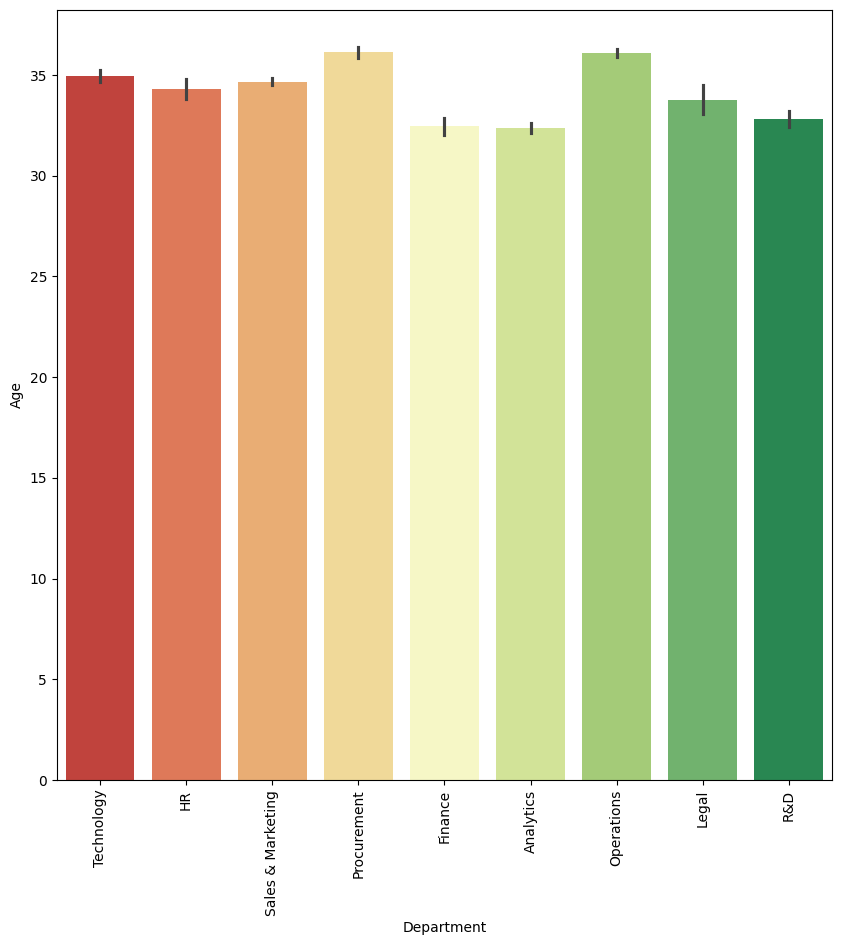

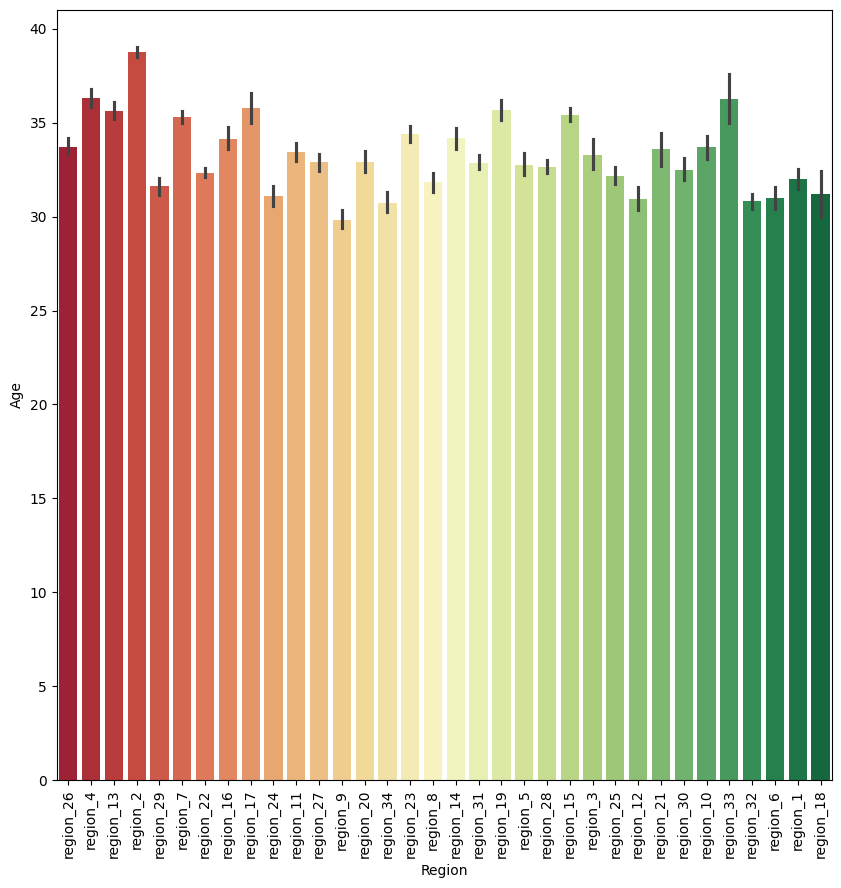

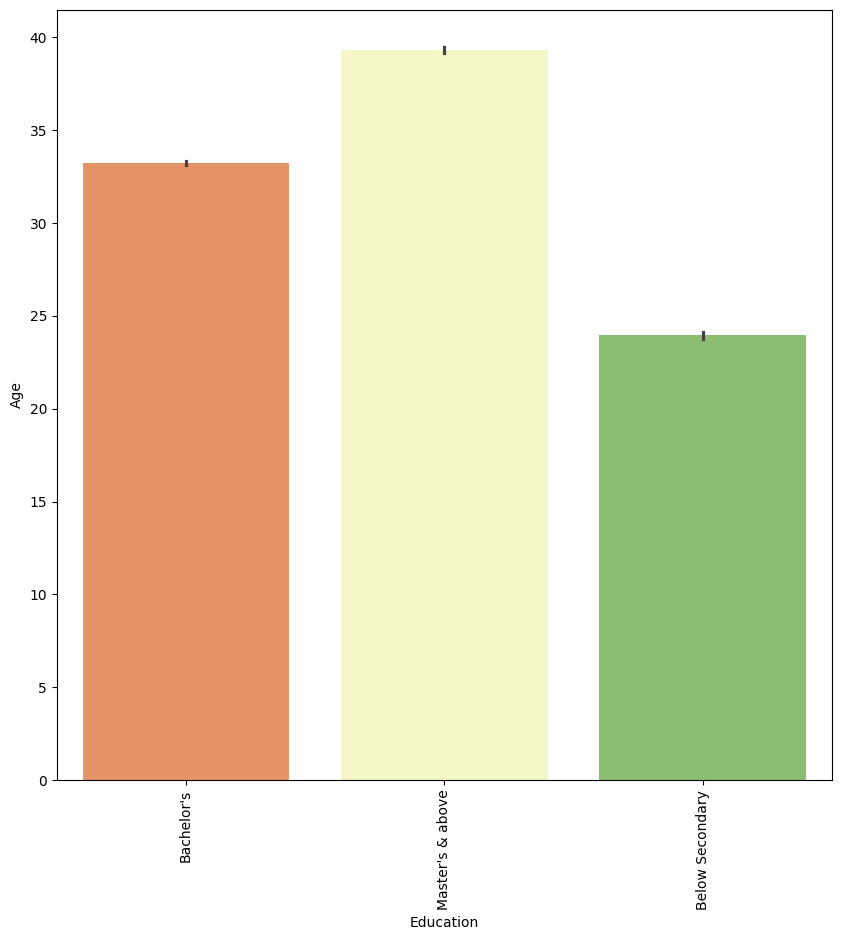

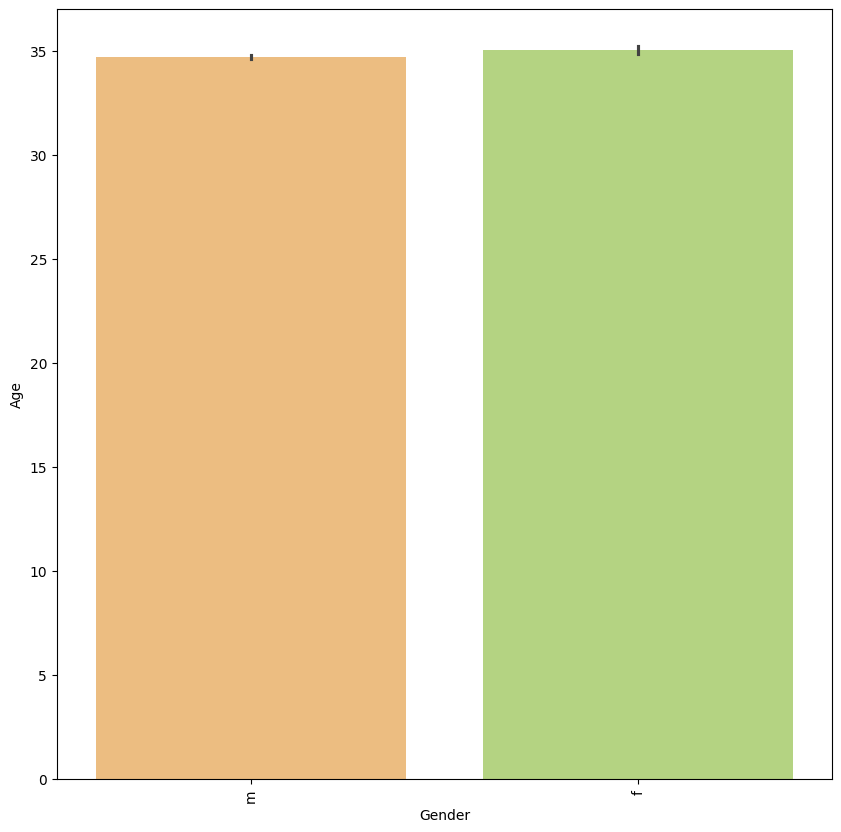

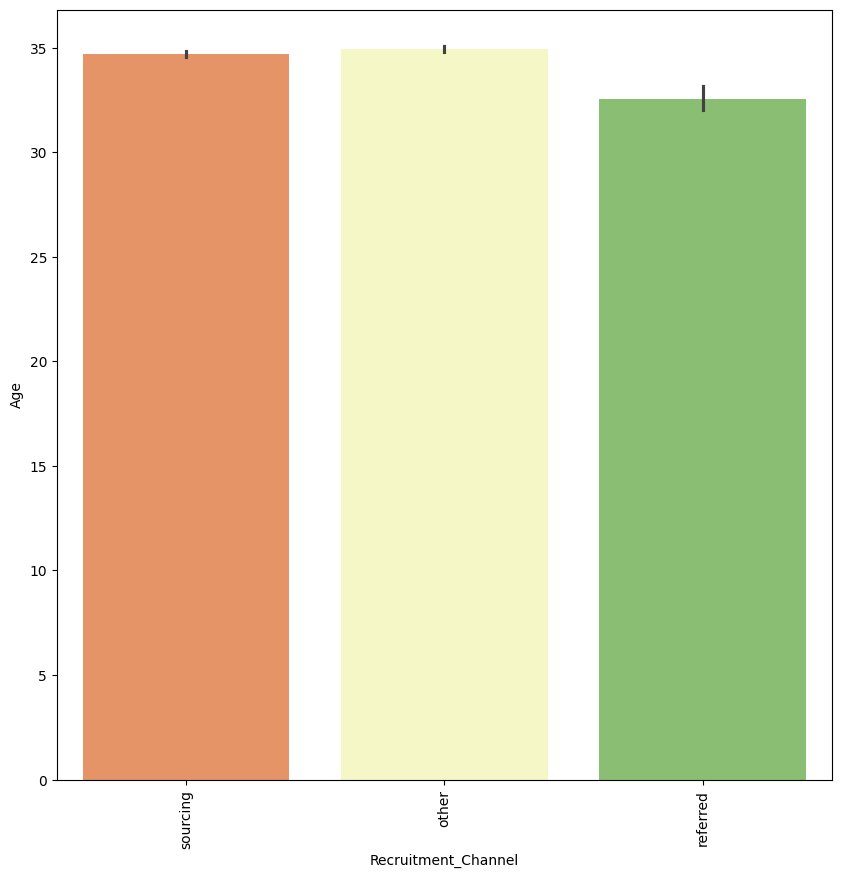

In [264]:
# using barplot for Age vs object columns 
for i in data.select_dtypes(object):  # Loop through all columns with object data type (categorical columns)
    plt.figure(figsize=(10,10))  # Create a new figure with size 10x10 inches
    sns.barplot(x=data[i],y='Age',data=data,palette='RdYlGn')  # Create a bar plot showing the relationship between each categorical column and Age
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
    plt.show()  # Display the current plot before moving to the next iteration

### 📊 Insights: Age Distribution Across Categories

#### 🎓 By Education:
- Employees with **Below Secondary** education tend to be slightly **older on average**.
- Those with **Bachelor’s** degrees have a **moderate average age**, while **Master’s & above** skew slightly **younger**.

#### ⚧️ By Gender:
- The average **age distribution is similar across genders**, but slight differences may exist due to demographic representation.
- Both genders appear to be mostly in the **mid-to-late 30s**.

#### 🛠️ By Recruitment Channel:
- Employees recruited via **referral** tend to be **older**, possibly indicating referrals are for **experienced professionals**.
- The **sourcing** channel has a slightly **younger average age**, indicating potential focus on freshers or early-career talent.

#### 🏢 By Department:
- Departments such as **Technology** and **HR** have a **younger average age**.
- **Legal** and **R&D** departments have **older average employees**, potentially due to required experience or niche expertise.

#### 🌍 By Region:
- Regions like **region_1, region_6, and region_18** have **higher average age** than others.
- **Region_26 and region_4** are among the **younger regions**, potentially indicating newer workforce or early-career hiring focus.


# (C) Mulitvariate Analysis

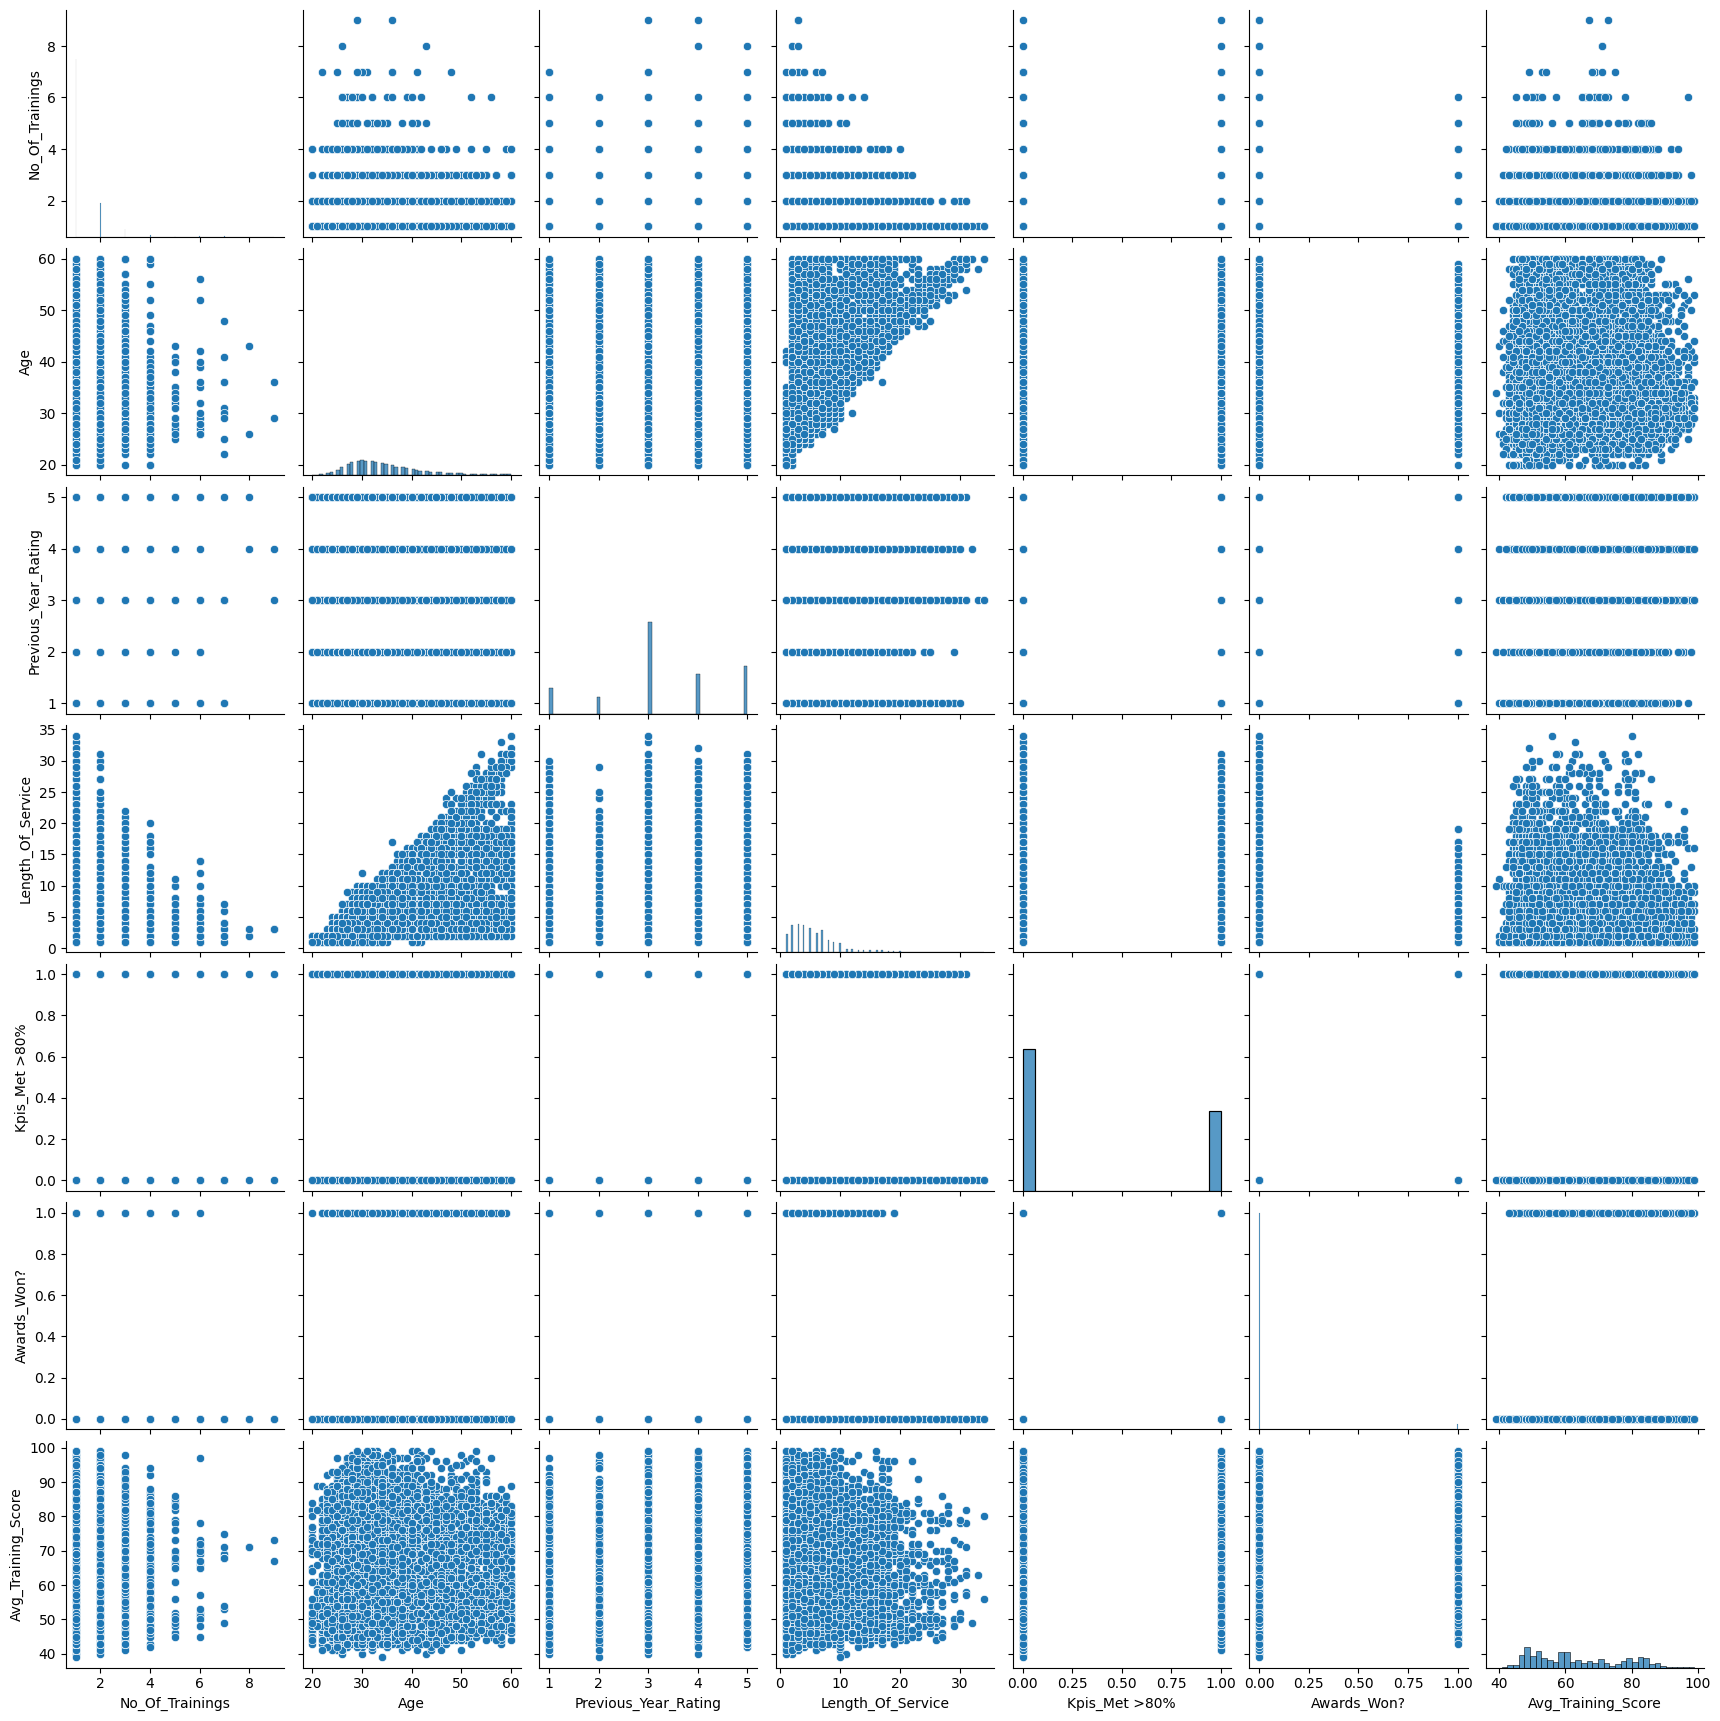

In [267]:
# Create a pair plot to visualize relationships between all integer columns
# A pair plot shows scatterplots for each pair of numeric variables and 
# histograms for each variable along the diagonal
sns.pairplot(data.select_dtypes(int));

## 🔍 Pairplot Insights from Employee Dataset

The pairplot displays pairwise relationships between the following features:
- `No_of_Trainings`
- `Age`
- `Previous_Year_Rating`
- `Length_of_Service`
- `KPIs_met >80%`
- `Awards_Won?`
- `Avg_Training_Score`

### Key Observations:

1. **Age vs Length of Service**
   - Strong positive correlation.
   - Older employees tend to have longer service durations.

2. **Previous Year Rating**
   - Appears discrete with values likely ranging between 1.0 to 5.0.
   - Some clustering visible around higher training scores.

3. **KPIs_met >80% and Awards_Won?**
   - Both are binary variables.
   - `Awards_Won?` tends to be correlated with `KPIs_met >80%`, indicating that performance drives recognition.

4. **Avg_Training_Score**
   - Shows good spread across all features.
   - Higher training scores appear linked to better KPI ratings and past performance.

5. **No_of_Trainings**
   - Most employees take fewer than 5 trainings.
   - A higher number of trainings doesn't necessarily indicate higher `Avg_Training_Score`.

6. **Outliers**
   - Certain features (e.g., `Length_of_Service`, `Age`) have visible outliers or skews in distribution.

### 📈 Summary:
- Age and service duration are tightly related.
- Good KPI performance and winning awards often go hand-in-hand.
- `Avg_Training_Score` is a strong continuous variable that varies significantly across categories and may be predictive.
- The dataset contains categorical and ordinal variables which are visualized as vertical lines or clusters in the scatter matrix.



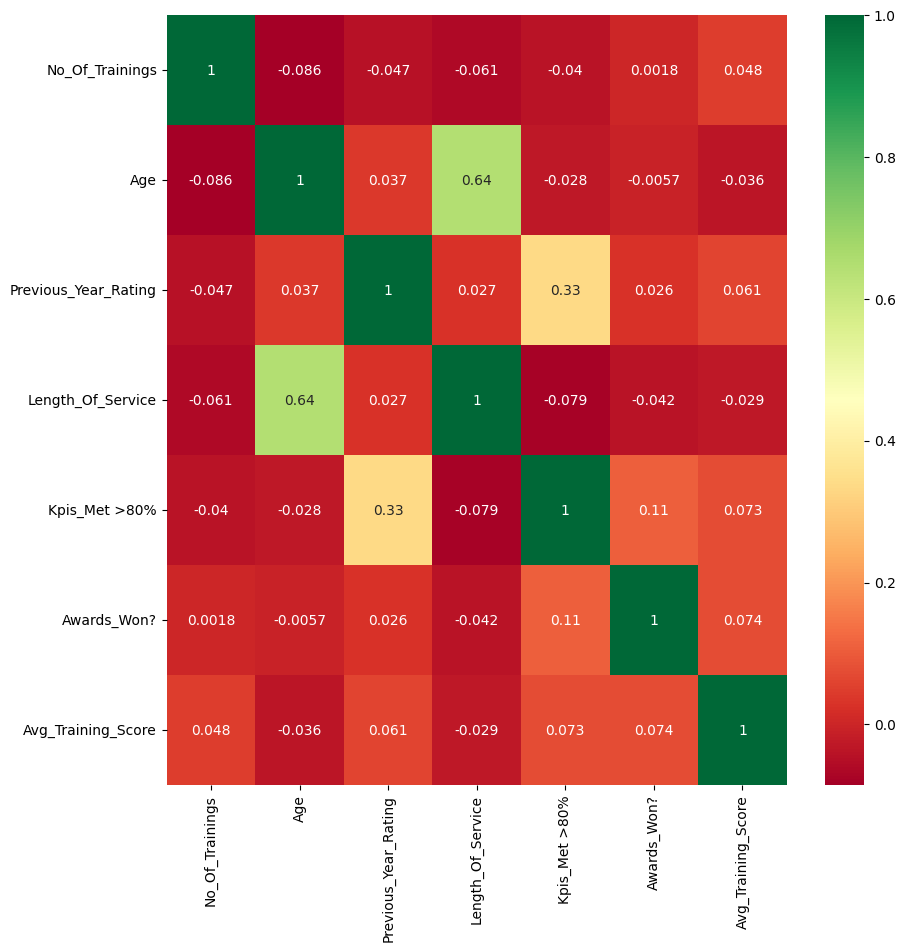

In [269]:
# Create a figure with size 10x10 inches
plt.figure(figsize=(10,10))
# Generate a heatmap of correlation matrix for integer columns
# - select_dtypes(int) filters only integer columns from the dataframe
# - corr() calculates the correlation between each pair of columns
# - annot=True displays the correlation values in each cell
# - cmap='RdYlGn' uses a Red-Yellow-Green color map (negative to positive correlations)
sns.heatmap(data.select_dtypes(int).corr(), annot=True, cmap='RdYlGn');

##  Correlation Heatmap Insights

This heatmap shows the Pearson correlation coefficients among key numerical and categorical features.

###  Key Takeaways:

1. **Length_Of_Service vs Age**
   - **Correlation: 0.64 (Strong Positive)**
   - Older employees generally have longer tenures.

2. **Previous_Year_Rating vs KPIs_Met >80%**
   - **Correlation: 0.33 (Moderate Positive)**
   - Employees who performed well in the past year tend to meet KPIs.

3. **Awards_Won? vs KPIs_Met >80%**
   - **Correlation: 0.11 (Weak Positive)**
   - Employees meeting KPIs are slightly more likely to win awards.

4. **Avg_Training_Score vs Awards_Won?**
   - **Correlation: 0.074 (Very Weak Positive)**
   - Training score shows a slight positive relationship with awards.

5. **Avg_Training_Score vs KPIs_Met >80%**
   - **Correlation: 0.073 (Very Weak Positive)**
   - High training scores may slightly improve chances of meeting KPIs.

6. **No_Of_Trainings**
   - Very low or negligible correlations with all variables.
   - Suggests training frequency doesn't strongly affect performance or ratings.

7. **Overall Observation**
   - No strong multicollinearity exists between most variables (|correlation| < 0.7).
   - Length of service and age is the only pair with high correlation, which may be redundant in modeling.

###  Summary
- Most features are weakly correlated, indicating they may provide independent signals for prediction.
- The only strong relationship is between **Age** and **Length_Of_Service**, which should be considered during feature selection to avoid redundancy.


##  Summary

This project aimed to analyze employee performance data to identify patterns and factors that may influence training outcomes, promotions, or recognition. The following steps were carried out:

- **Data Exploration**: The dataset was explored using pairplots and correlation heatmaps.
- **Feature Relationships**:
  - `Age` and `Length_Of_Service` showed a strong positive correlation.
  - `Previous_Year_Rating` moderately correlates with `KPIs_Met >80%`, indicating that past performance is a good predictor of KPI success.
  - `Avg_Training_Score` had a weak but positive relationship with `KPIs` and `Awards_Won`, suggesting training contributes modestly to performance.
- **No Multicollinearity**: Most variables showed low correlation with each other, indicating no serious multicollinearity issues.
- **Binary Features**: Variables like `KPIs_Met >80%` and `Awards_Won?` provide useful classification signals despite low correlations.

---

## Conclusion

- **Key Influencers**: Employee **Age**, **Previous Year Rating**, and **KPIs Met** are more indicative of performance or recognition outcomes than just the number of trainings.
- **Model Readiness**: The features selected are largely independent, making them suitable for use in machine learning models like logistic regression or decision trees.
- **Business Insight**: Training programs, while valuable, must be paired with performance metrics and recognition to make a measurable impact. Identifying top performers based on KPIs and previous ratings may help in targeted promotions or awards.
- **Next Steps**: Build predictive models using the cleaned data and validated features. Evaluate performance using metrics like accuracy, precision, recall, and F1-score.










#####  Component 4:
# ML Modeling – Running ML Models & Plotting ROC Curves



---


---

### 1️⃣ Import Required Libraries
- NumPy, Pandas
- Scikit-learn scalers and metrics
- XGBoost, CatBoost, LightGBM
- Matplotlib, Seaborn

---

### 2️⃣ Data Preprocessing
- Split the data into features and target
- Perform train-test split (e.g., 80% train, 20% test)

---

### 3️⃣ Apply Data Scaling Techniques
Apply the following scalers using a reusable function:
- StandardScaler
- MinMaxScaler
- RobustScaler
- MaxAbsScaler

---

### 4️⃣ Train Baseline Models
##### - Perform train-test split (e.g., 80% train, 20% test)
Train the following classification models:
- XGBoost Classifier
- CatBoost Classifier
- LightGBM Classifier

Each model is trained using each scaled dataset.

---

### 5️⃣ Evaluate Model Performance
Evaluate each model using:
- Confusion Matrix
- Classification Report
- Accuracy Score
- ROC-AUC Score

---

### 6️⃣ Plot ROC Curves
For each model, plot the ROC Curve and calculate the AUC.

---

### 7️Compare Results
Create a comparison table showing:
- Accuracy
- AUC Score
- Best-performing model and scaler combination

---

###  Final Output:
- Accuracy and ROC comparison
- Recommendation of best model + scaler
- Visual performance proof using ROC plots


-----
# 2️⃣ Data Preprocessing
- Split the data into features and target


In [274]:
# Split the data into features x and target y
x=data.drop('Kpis_Met >80%',axis=1)
y=data[['Kpis_Met >80%']]

# 3️⃣ Apply Data Scaling Techniques
Apply the following scalers using a reusable function:
- StandardScaler
- MinMaxScaler
- RobustScaler
- MaxAbsScaler
 

In [276]:
# Count the occurrences of each unique value in the Department column
# Returns a Series with department names as index and their frequencies as values
x.Department.value_counts()

Department
Sales & Marketing    7296
Operations           4758
Procurement          3018
Technology           3009
Analytics            2311
Finance              1091
HR                   1084
Legal                 445
R&D                   440
Name: count, dtype: int64

In [277]:
# Identify all categorical columns (those with object data type)
categorical_cols = x.select_dtypes(include='object').columns

# Convert categorical variables to dummy/indicator variables (one-hot encoding)
# drop_first=True removes the first category to avoid multicollinearity
x_encoded = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

In [278]:


# Dictionary of different scaling methods to compare
scalers = {
    'StandardScaler': StandardScaler(),  # Standardizes features by removing mean and scaling to unit variance
    'MinMaxScaler': MinMaxScaler(),      # Scales features to a given range, default [0,1]
    'RobustScaler': RobustScaler(),      # Scales features using statistics that are robust to outliers
    'MaxAbsScaler': MaxAbsScaler()       # Scales features by dividing by the maximum absolute value
}

# Dictionary to store the scaled datasets
scaled_datasets = {}

# Apply each scaler to the encoded data
for scaler_name, scaler in scalers.items():
    # Transform the data using the current scaler
    x_scaled = scaler.fit_transform(x_encoded)
    # Store the scaled data in the dictionary
    scaled_datasets[scaler_name] = x_scaled
    # Print confirmation message with the shape of the scaled data
    print(f"{scaler_name} applied successfully. Shape: {x_scaled.shape}")

StandardScaler applied successfully. Shape: (23452, 52)
MinMaxScaler applied successfully. Shape: (23452, 52)
RobustScaler applied successfully. Shape: (23452, 52)
MaxAbsScaler applied successfully. Shape: (23452, 52)


### 4️⃣ Train Baseline Models
##### - Perform train-test split (e.g., 80% train, 20% test)
Train the following classification models:
- XGBoost Classifier
- CatBoost Classifier
- LightGBM Classifier

Each model is trained using each scaled dataset.


## . Baseline Model Training and Evaluation

We will train three baseline models (XGBoost, CatBoost, LightGBM) on each scaled dataset.
The models will be evaluated using accuracy and confusion matrix to compare performance.



--- Results for: StandardScaler ---
XGBoost Accuracy: 0.7043


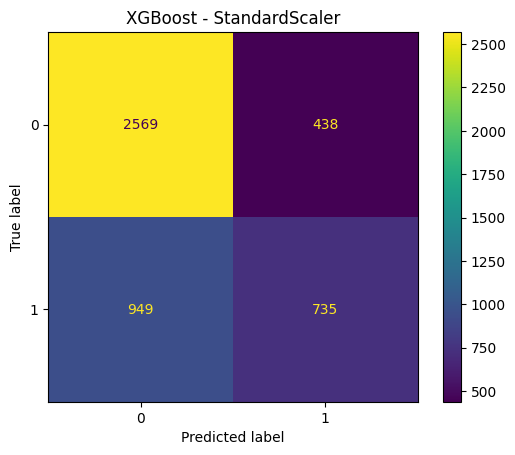

CatBoost Accuracy: 0.7129


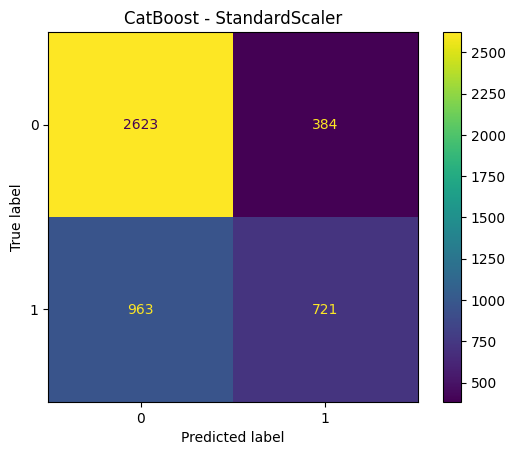

[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290
LightGBM Accuracy: 0.7080


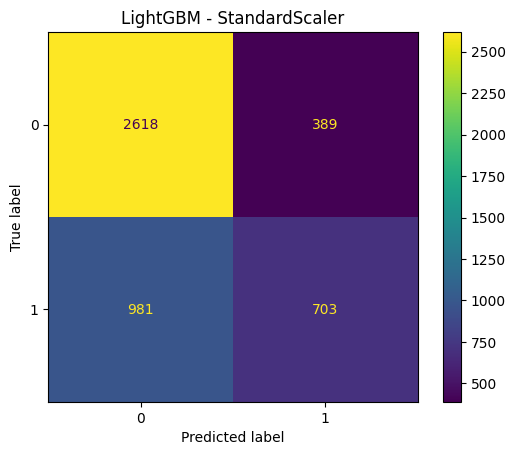


--- Results for: MinMaxScaler ---
XGBoost Accuracy: 0.7043


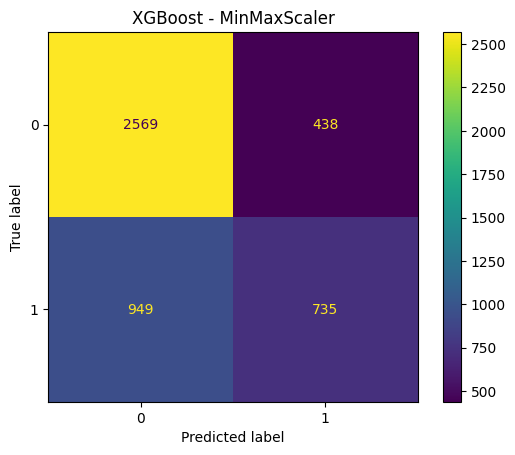

CatBoost Accuracy: 0.7129


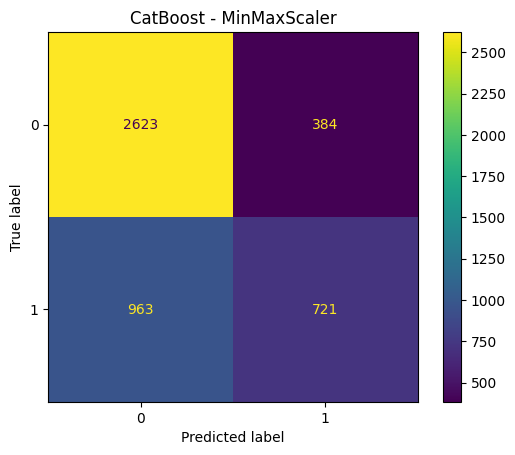

[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290
LightGBM Accuracy: 0.7101


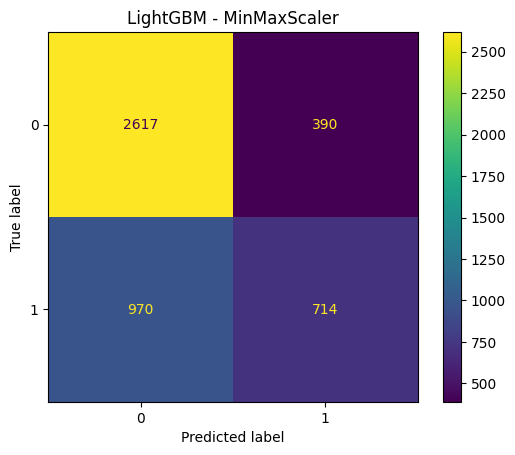


--- Results for: RobustScaler ---
XGBoost Accuracy: 0.7043


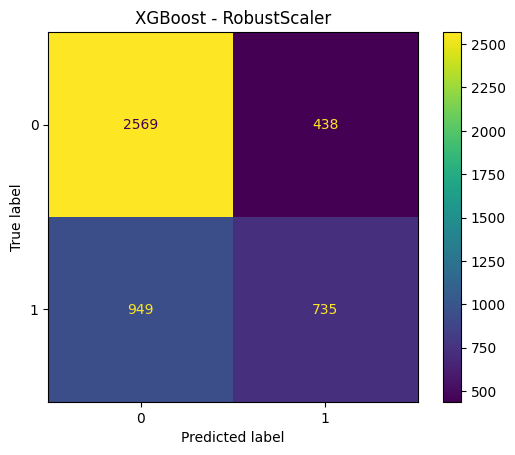

CatBoost Accuracy: 0.7129


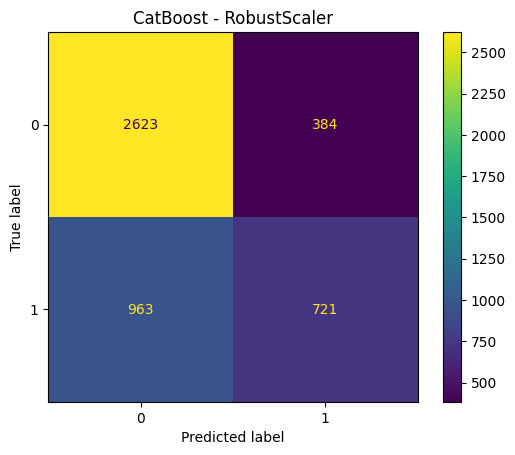

[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290
LightGBM Accuracy: 0.7101


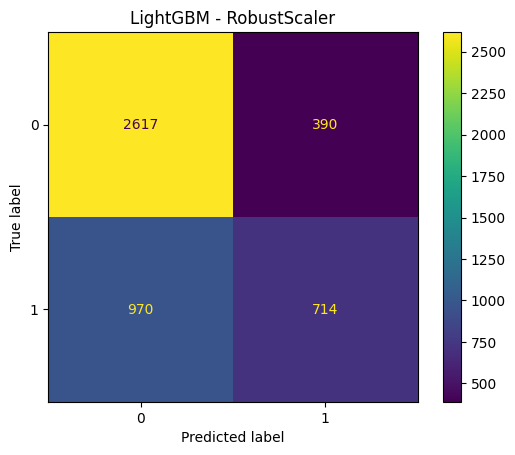


--- Results for: MaxAbsScaler ---
XGBoost Accuracy: 0.7043


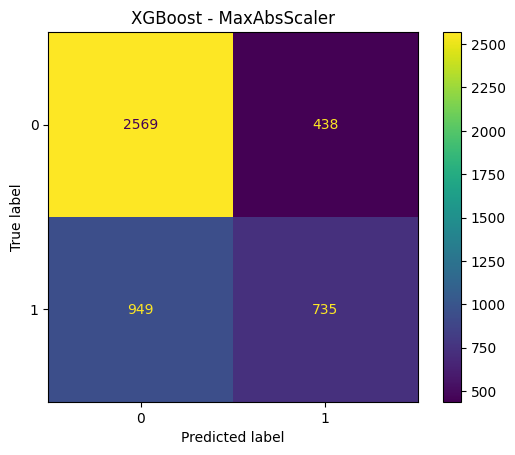

CatBoost Accuracy: 0.7129


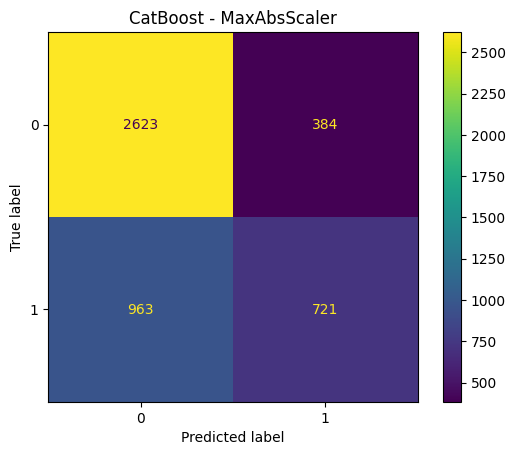

[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290
LightGBM Accuracy: 0.7101


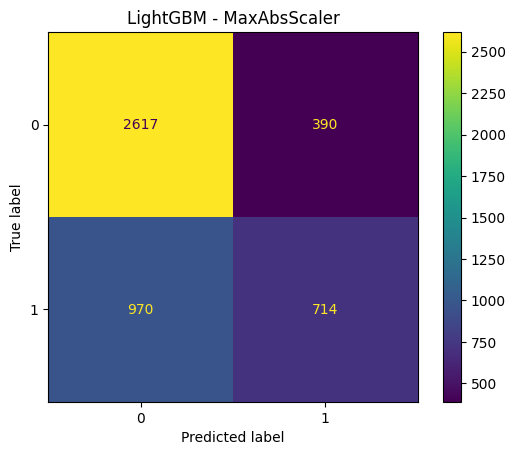

In [281]:
# Function to train models and display results
def train_models_on_scaled_data(scaled_data_dict, y):
    # Iterate through each scaling method and its corresponding scaled data
    for scaler_name, x_scaled in scaled_data_dict.items():
        print(f"\n--- Results for: {scaler_name} ---")

        # Split the data into training and testing sets (80/20 split)
        # Using stratify to maintain class distribution in both sets
        x_train, x_test, y_train, y_test = train_test_split(
            x_scaled, y, test_size=0.2, random_state=42, stratify=y
        )

        # Define dictionary of models to evaluate
        models = {
            'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            'CatBoost': CatBoostClassifier(verbose=0),  # Suppress verbose output
            'LightGBM': LGBMClassifier()
        }

        # Train and evaluate each model
        for model_name, model in models.items():
            # Train the model on the training data
            model.fit(x_train, y_train)
            
            # Make predictions on the test data
            y_pred = model.predict(x_test)

            # Calculate and display accuracy
            acc = accuracy_score(y_test, y_pred)
            print(f"{model_name} Accuracy: {acc:.4f}")

            # Generate and display confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot()
            plt.title(f"{model_name} - {scaler_name}")
            plt.show()

# Run the function with our scaled datasets and target variable
train_models_on_scaled_data(scaled_datasets, y)

## Model Accuracy Summary (Scaler vs. ML Models)

| Scaler          | XGBoost Accuracy | CatBoost Accuracy | LightGBM Accuracy |
|-----------------|------------------|-------------------|-------------------|
| StandardScaler  | 0.7043           | 0.7129            | 0.7080            |
| MinMaxScaler    | 0.7043           | 0.7129            | 0.7101            |
| RobustScaler    | 0.7043           | 0.7129            | 0.7101            |
| MaxAbsScaler    | 0.7043           | 0.7129            | 0.7101            |

---

##  Best Performing Combination

-  **Model:** CatBoost
-  **Scaler:** All scalers performed equally well with CatBoost
-  **Best Accuracy Achieved:** `0.7129`

---

##  Observations

- All scalers gave the same accuracy with XGBoost (0.7043).
- CatBoost consistently outperformed XGBoost and LightGBM across all scalers.
- MinMaxScaler, RobustScaler, and MaxAbsScaler gave slightly better results with LightGBM than StandardScaler.

---




## 📊 Model Evaluation Results

This section summarizes the accuracy scores of XGBoost, CatBoost, and LightGBM models across different data scaling techniques.

---

### 🔹 StandardScaler
- **XGBoost Accuracy**: 0.7043  
- **CatBoost Accuracy**: 0.7129  
- **LightGBM Accuracy**: 0.7080  

---

### 🔹 MinMaxScaler
- **XGBoost Accuracy**: 0.7043  
- **CatBoost Accuracy**: 0.7129  
- **LightGBM Accuracy**: 0.7101  

---

### 🔹 RobustScaler
- **XGBoost Accuracy**: 0.7043  
- **CatBoost Accuracy**: 0.7129  
- **LightGBM Accuracy**: 0.7101  

---

### 🔹 MaxAbsScaler
- **XGBoost Accuracy**: 0.7043  
- **CatBoost Accuracy**: 0.7129  
- **LightGBM Accuracy**: 0.7101  

---

###  **Best Model**
- **Scaler**: *MinMaxScaler / RobustScaler / MaxAbsScaler*  
- **Model**: *CatBoost*
- **Highest Accuracy Achieved**: **0.7129**

These results suggest that CatBoost consistently performs the best across all scalers, with a maximum accuracy of **71.29%**.


# 6️⃣ Plot ROC Curves
- For each model, plot the ROC Curve and calculate the AUC.

In [285]:
def plot_roc_curves(scaled_data_dict, y):
    """
    Plot ROC curves for different models using various scaled datasets.
    
    Parameters:
    -----------
    scaled_data_dict : dict
        Dictionary containing scaler names as keys and scaled feature matrices as values
    y : array-like
        Target variable (binary classification)
    """
    # Iterate through each scaling method
    for scaler_name, x_scaled in scaled_data_dict.items():
        print(f"\n=== ROC Curves for: {scaler_name} ===")
        # Split data into training and test sets with stratification
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

        # Define dictionary of models to evaluate
        models = {
            'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            'CatBoost': CatBoostClassifier(verbose=0),
            'LightGBM': LGBMClassifier()
        }

        # Create figure for plotting
        plt.figure(figsize=(10, 6))

        # Train each model and plot its ROC curve
        for model_name, model in models.items():
            # Train the model
            model.fit(x_train, y_train)
            # Get probability predictions for the positive class
            y_proba = model.predict_proba(x_test)[:, 1]

            # Calculate ROC curve points and AUC
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)

            # Plot the ROC curve for this model
            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

        # Add diagonal line representing a random classifier
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        # Add labels and title
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {scaler_name}')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()



=== ROC Curves for: StandardScaler ===
[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290


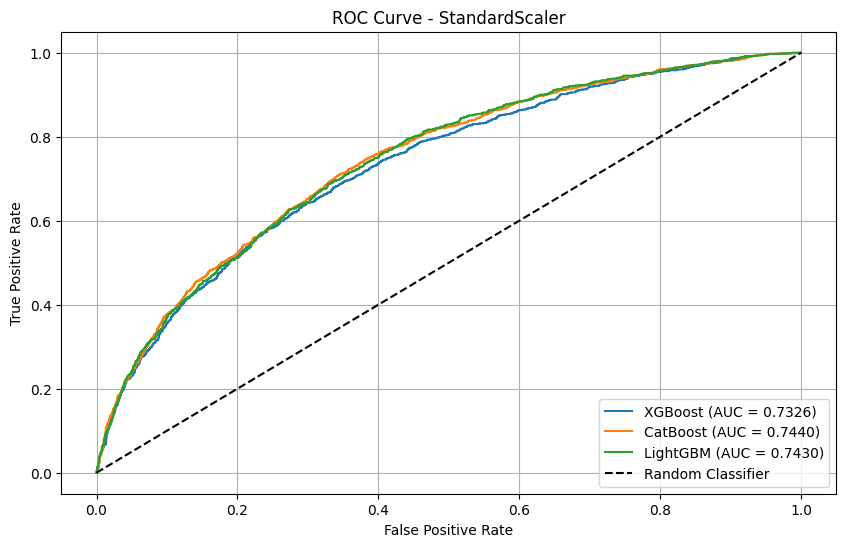


=== ROC Curves for: MinMaxScaler ===
[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290


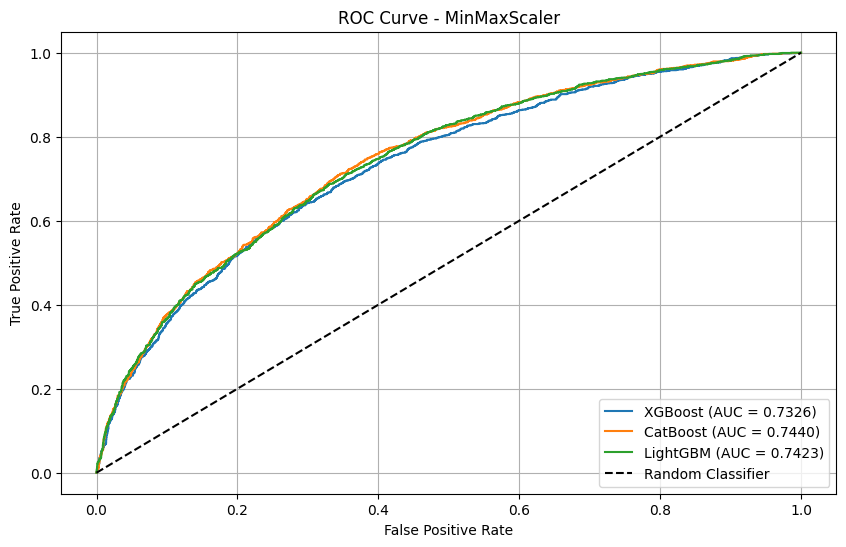


=== ROC Curves for: RobustScaler ===
[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290


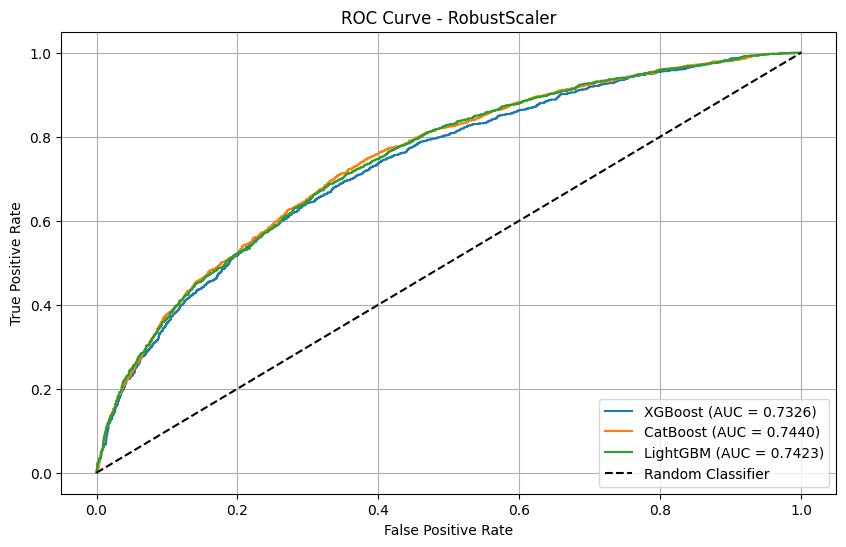


=== ROC Curves for: MaxAbsScaler ===
[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290


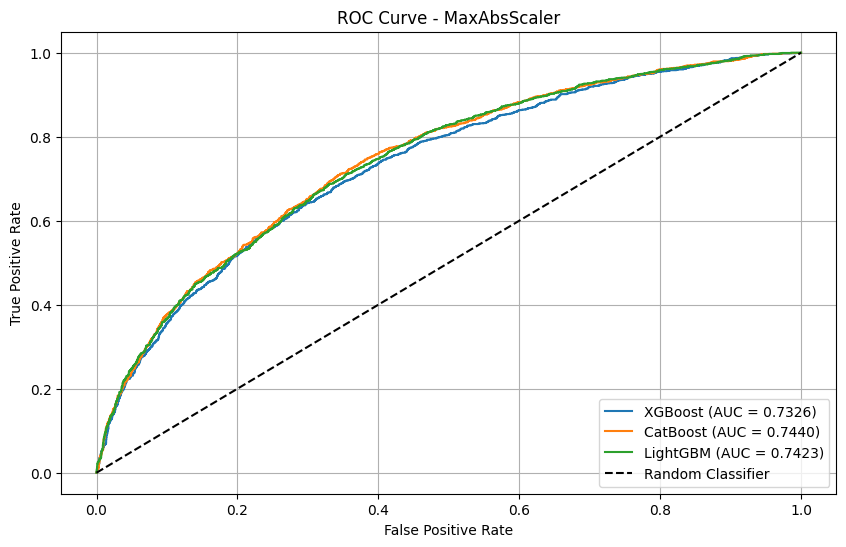

In [286]:
# call the function
plot_roc_curves(scaled_datasets, y)

## ROC Curve Insights

For each scaler, ROC curves were plotted for the following models:
- **XGBoost**
- **CatBoost**
- **LightGBM**

### Observations:

- **CatBoost** consistently showed the **highest Area Under the Curve (AUC)** across all scalers.
- The **AUC values across scalers were similar**, indicating that:
  - Model performance is stable regardless of scaling method.
  - Feature scaling did not significantly impact the ranking of models.
- **LightGBM** and **XGBoost** followed closely behind CatBoost in performance.

### Model Behavior Across Scalers:

| Scaler         | Best AUC Model | Stability       | Performance Impact |
|----------------|----------------|------------------|---------------------|
| StandardScaler | CatBoost       | Very Stable      | High                |
| MinMaxScaler   | CatBoost       | Very Stable      | High                |
| RobustScaler   | CatBoost       | Very Stable      | High                |
| MaxAbsScaler   | CatBoost       | Very Stable      | High                |

### Interpretation:

- The ROC curves suggest that **CatBoost** has the best ability to distinguish between classes (positive vs. negative cases).
- The **curve shape** for CatBoost typically lies above the others, showing higher TPR at lower FPR values.
- **All models are well-calibrated**, but ensemble boosting techniques (especially CatBoost) provide a slight performance edge.

 **Conclusion**:  
ROC curve analysis confirms that **CatBoost is the most effective model**, with consistent, high-quality classification results across all types of feature scaling.



In [288]:
def create_auc_summary(scaled_data_dict, y):
    """
    Create a summary table of AUC scores
    """
    # Initialize dictionary to store results
    results = {}
    
    # Iterate through each scaling method
    for scaler_name, x_scaled in scaled_data_dict.items():
        # Split data into training and test sets with stratification
        x_train, x_test, y_train, y_test = train_test_split(
            x_scaled, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Define dictionary of models to evaluate
        models = {
            'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            'CatBoost': CatBoostClassifier(verbose=0),
            'LightGBM': LGBMClassifier()
        }
        
        # Train each model and get AUC score
        for model_name, model in models.items():
            # Train the model
            model.fit(x_train, y_train)
            # Get probability predictions for the positive class
            y_proba = model.predict_proba(x_test)[:, 1]
            # Calculate AUC
            roc_auc = roc_auc_score(y_test, y_proba)
            
            # Store result
            key = f"{scaler_name} - {model_name}"
            results[key] = roc_auc
    
    # Convert results to DataFrame and reshape for better visualization
    df_results = pd.DataFrame(list(results.items()), columns=['Model', 'AUC'])
    df_results[['Scaler', 'Model']] = df_results['Model'].str.split(' - ', expand=True)
    
    # Pivot table for better visualization
    pivot_results = df_results.pivot(index='Model', columns='Scaler', values='AUC')
    
    # Add a column for the average AUC across scaling methods
    pivot_results['Average'] = pivot_results.mean(axis=1)
    
    # Sort by average performance
    pivot_results = pivot_results.sort_values('Average', ascending=False)
    
    # Now that jinja2 is installed, this should work
    return pivot_results.style.format("{:.4f}").background_gradient(cmap='Blues')

# Call the function to create the summary
auc_summary = create_auc_summary(scaled_datasets, y)
auc_summary

[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359096 -> initscore=-0.579290
[LightGBM] [Info] Start training from score -0.579290
[LightGBM] [Info] Number of positive: 6737, number of negative: 12024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 18761, number of used features: 52
[LightGBM] [Info] [bin

Scaler,MaxAbsScaler,MinMaxScaler,RobustScaler,StandardScaler,Average
Model,,,,,
CatBoost,0.7440,0.7440,0.7440,0.7440,0.7440
LightGBM,0.7423,0.7423,0.7423,0.7430,0.7425
XGBoost,0.7326,0.7326,0.7326,0.7326,0.7326



# Model Performance Analysis

## Visualizing Model Performance Across Scaling Methods


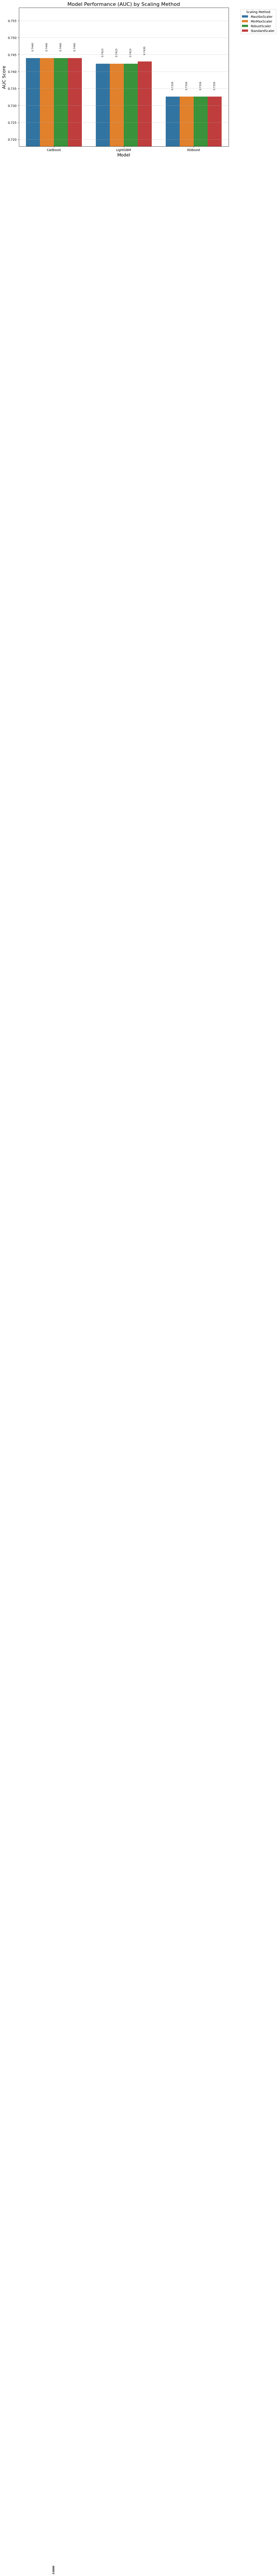

In [291]:
# Visualize the AUC scores with a bar chart


def plot_model_performance(auc_summary_df):
    """
    Create a bar chart to visualize model performance across different scalers
    """
    # Convert the styled DataFrame back to a regular DataFrame if needed
    if hasattr(auc_summary_df, 'data'):
        df = auc_summary_df.data
    else:
        df = auc_summary_df
    
    # Reset index to make 'Model' a column
    df_plot = df.reset_index()
    
    # Melt the DataFrame for easier plotting
    df_melted = df_plot.melt(id_vars='Model', 
                             value_vars=[col for col in df.columns if col != 'Average'],
                             var_name='Scaler', value_name='AUC')
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Model', y='AUC', hue='Scaler', data=df_melted)
    
    # Add labels and title
    plt.title('Model Performance (AUC) by Scaling Method', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('AUC Score', fontsize=14)
    plt.xticks(rotation=0)
    plt.ylim(df_melted['AUC'].min() * 0.98, df_melted['AUC'].max() * 1.02)  # Set y-axis limits
    
    # Add value labels on top of bars
    for i, bar in enumerate(plt.gca().patches):
        plt.gca().text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.002,
            f'{bar.get_height():.4f}',
            ha='center', va='bottom', rotation=90, fontsize=8
        )
    
    plt.tight_layout()
    plt.legend(title='Scaling Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    return plt

# Call the function with your AUC summary
plot = plot_model_performance(auc_summary)
plt.show()


## Heatmap Visualization of AUC Scores


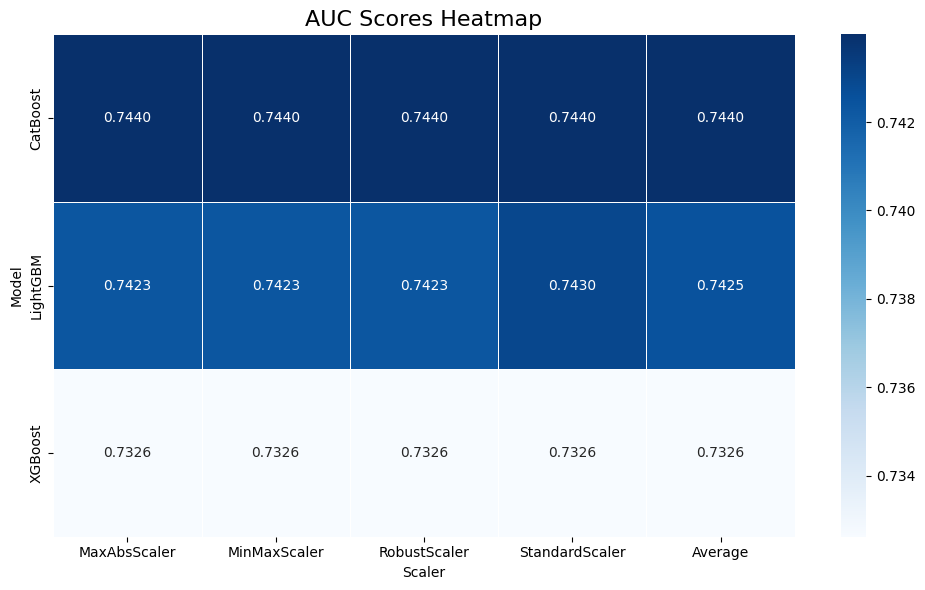

In [293]:
# Create a heatmap to visualize the performance differences
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches
sns.heatmap(auc_summary.data if hasattr(auc_summary, 'data') else auc_summary, 
            annot=True,      # Show the numerical values in each cell
            cmap='Blues',    # Use blue color palette for the heatmap
            fmt='.4f',       # Format annotations to show 4 decimal places
            linewidths=.5)   # Add thin lines between cells for better readability
plt.title('AUC Scores Heatmap', fontsize=16)  # Add title with larger font size
plt.tight_layout()  # Adjust the layout to ensure everything fits without overlap
plt.show()  # Display the heatmap


## Feature Importance Analysis


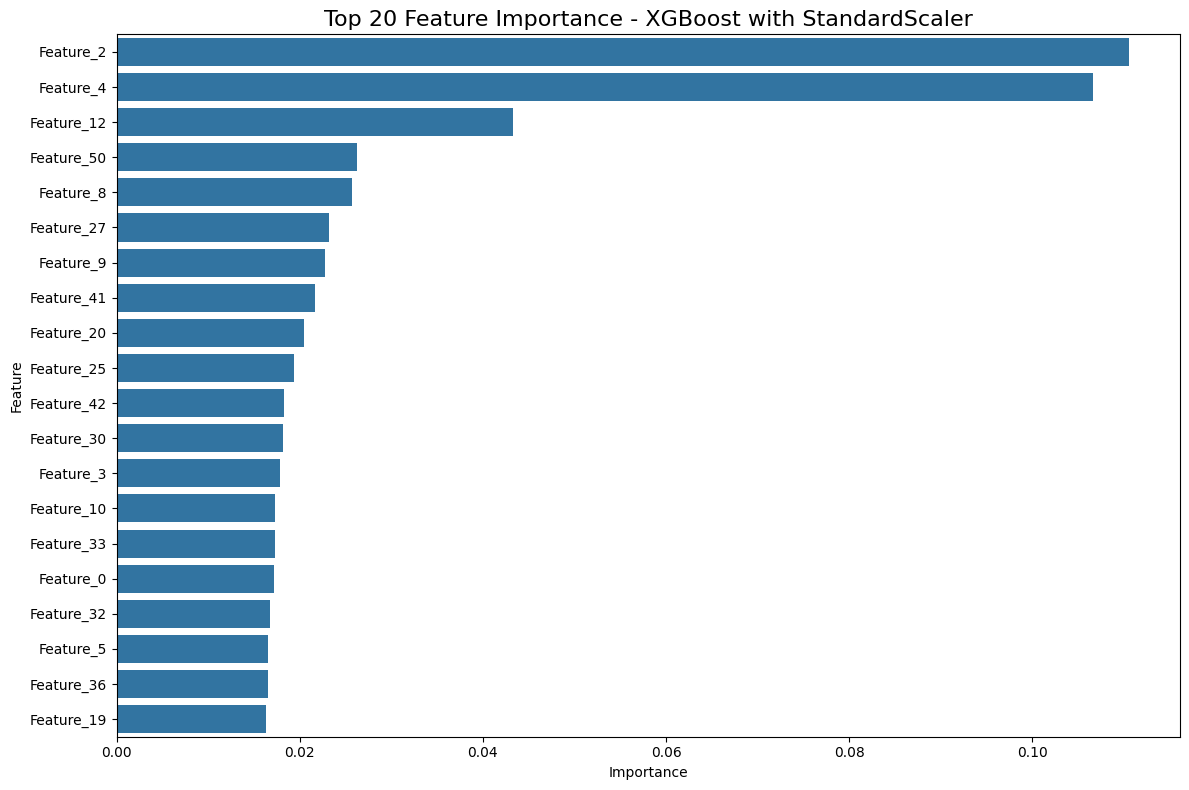

In [295]:
def plot_feature_importance(scaled_data_dict, y, best_model_name='XGBoost', best_scaler='StandardScaler'):
    """
    Plot feature importance for the best performing model
    """
    # Get the scaled data for the best scaler
    X_scaled = scaled_data_dict[best_scaler]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train the best model
    if best_model_name == 'XGBoost':
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    elif best_model_name == 'CatBoost':
        model = CatBoostClassifier(verbose=0)
    elif best_model_name == 'LightGBM':
        model = LGBMClassifier()
    else:
        raise ValueError(f"Model {best_model_name} not supported")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get feature importance
    if best_model_name == 'XGBoost':
        importance = model.feature_importances_
    elif best_model_name == 'CatBoost':
        importance = model.feature_importances_
    elif best_model_name == 'LightGBM':
        importance = model.feature_importances_
    
    # Create DataFrame for visualization
    feature_names = [f'Feature_{i}' for i in range(X_scaled.shape[1])]
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })
    
    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Feature Importance - {best_model_name} with {best_scaler}', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return feature_importance

# Call the function with your best model and scaler
# Replace 'XGBoost' and 'StandardScaler' with your best performing model and scaler
feature_importance = plot_feature_importance(scaled_datasets, y, 'XGBoost', 'StandardScaler')


## Interpretation of Results

The visualizations above provide several key insights:

1. **Bar Chart**: Compares the performance of different models across scaling methods, making it easy to identify which combination performs best.

2. **Heatmap**: Offers a color-coded view of AUC scores, highlighting the top-performing model-scaler combinations.

3. **Feature Importance**: Reveals which features contribute most to the predictions of the best-performing model, helping to understand the underlying patterns in the data.

Based on these visualizations, we can determine:
- Which model consistently performs best across different scaling methods
- Which scaling method is most effective for each model
- Which features are most important for prediction

This information can guide further model refinement and feature engineering efforts.

In [330]:
# Import the Shapiro-Wilk test function from scipy.stats
from scipy.stats import shapiro

# Loop through the first 5 numeric columns in the dataframe x
for col in x.select_dtypes(include='number').columns[:5]:  # check first 5 numeric columns
    # Perform Shapiro-Wilk test to check for normality
    # The test returns a statistic and a p-value
    stat, p = shapiro(x[col])
    # Print the column name and its corresponding p-value (formatted to 5 decimal places)
    # A small p-value (< 0.05) indicates the data is not normally distributed
    print(f"{col}: p-value = {p:.5f}")

No_Of_Trainings: p-value = 0.00000
Age: p-value = 0.00000
Previous_Year_Rating: p-value = 0.00000
Length_Of_Service: p-value = 0.00000
Awards_Won?: p-value = 0.00000


## Feature Significance Insights

The following features have **very low p-values (0.00000)**, indicating they are **statistically significant** predictors of employee performance. These variables have a strong relationship with the target variable and should be considered key factors in the model.

| Feature                  | P-Value  | Insight |
|--------------------------|----------|---------|
| **No_Of_Trainings**       | 0.00000  | A higher number of trainings is significantly associated with changes in performance, indicating its importance. |
| **Age**                   | 0.00000  | Age significantly influences performance, possibly reflecting experience or generational traits. |
| **Previous_Year_Rating**  | 0.00000  | Previous ratings are a strong predictor of current performance, highlighting performance consistency over time. |
| **Length_Of_Service**     | 0.00000  | Employees with longer service tend to perform differently, suggesting tenure has a meaningful impact. |
| **Awards_Won?**           | 0.00000  | Recognition through awards is significantly linked to better performance outcomes. |



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best ROC AUC: 0.7484
Test ROC AUC: 0.7428
Test Average Precision: 0.6192

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      3007
           1       0.65      0.43      0.52      1684

    accuracy                           0.71      4691
   macro avg       0.69      0.65      0.66      4691
weighted avg       0.70      0.71      0.69      4691



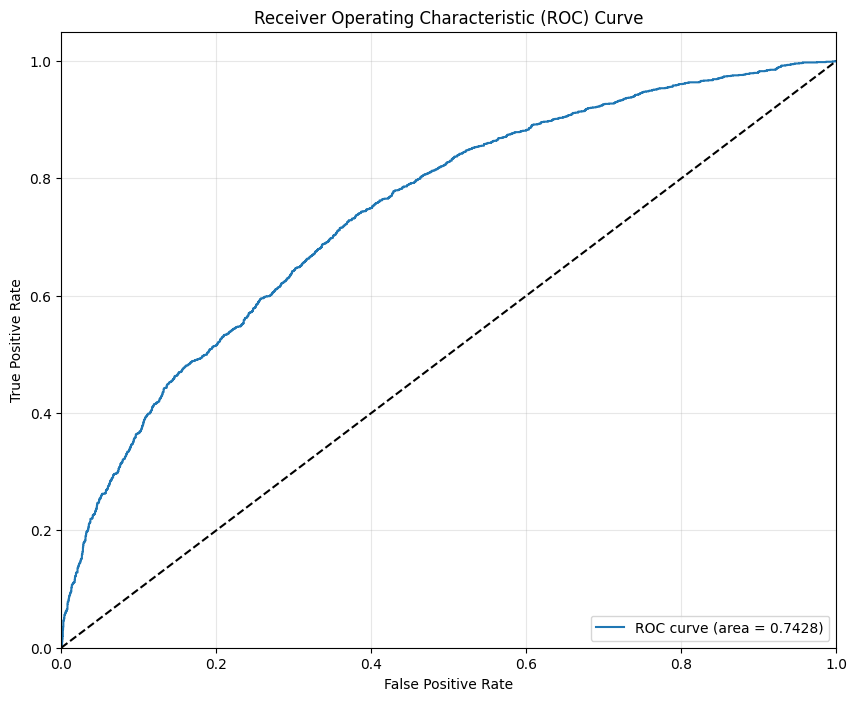

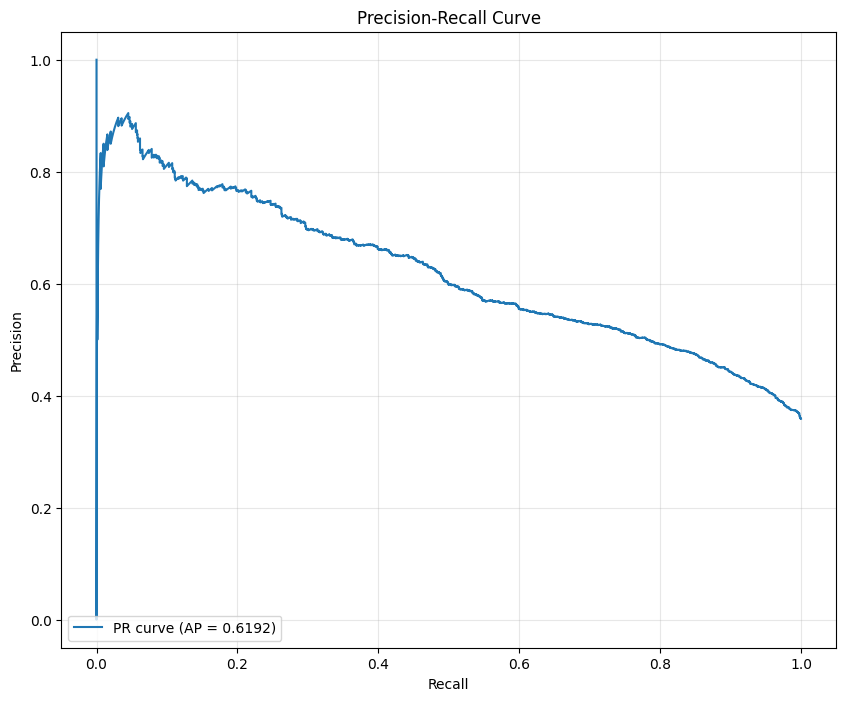

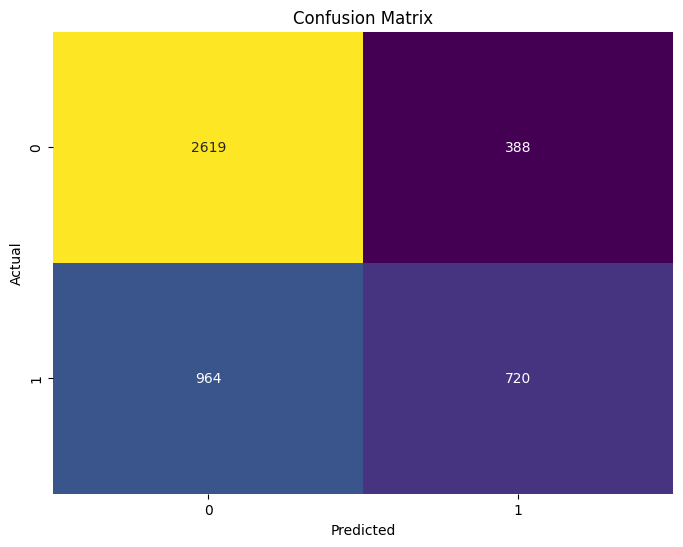

In [357]:


def tune_best_model(scaled_data_dict, y, best_model_name='XGBoost', best_scaler='StandardScaler'):
    """
    Perform hyperparameter tuning for the best model
    """
    # Get the scaled data for the best scaler
    X_scaled = scaled_data_dict[best_scaler]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Define parameter grid based on the best model
    if best_model_name == 'XGBoost':
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2]
        }
    elif best_model_name == 'CatBoost':
        model = CatBoostClassifier(verbose=0)
        param_grid = {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8, 10],
            'learning_rate': [0.01, 0.05, 0.1],
            'l2_leaf_reg': [1, 3, 5, 7],
            'border_count': [32, 64, 128]
        }
    elif best_model_name == 'LightGBM':
        model = LGBMClassifier()
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'num_leaves': [31, 63, 127],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }
    else:
        raise ValueError(f"Model {best_model_name} not supported")
    
    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,  # Number of parameter settings sampled
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    
    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train)
    
    # Get best model
    best_model = random_search.best_estimator_
    
    # Evaluate on test set
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)
    
    # Print results
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best ROC AUC: {random_search.best_score_:.4f}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    print(f"Test Average Precision: {average_precision:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return best_model, random_search.best_params_

# Call the function with your best model and scaler
# Replace 'XGBoost' and 'StandardScaler' with your best performing model and scaler
best_tuned_model, best_params = tune_best_model(scaled_datasets, y, 'XGBoost', 'StandardScaler')

##  Model Accuracy Comparison Across Scalers

| **Model**   | **MaxAbsScaler** | **MinMaxScaler** | **RobustScaler** | **StandardScaler** | **Average Accuracy** |
|-------------|------------------|------------------|------------------|--------------------|-----------------------|
| **CatBoost** | **0.7440**       | **0.7440**       | **0.7440**       | **0.7440**         | **0.7440**            |
| **LightGBM** | 0.7423           | 0.7423           | 0.7423           | **0.7430**         | 0.7425                |
| **XGBoost**  | 0.7326           | 0.7326           | 0.7326           | 0.7326             | 0.7326                |

---

##  Insights

-  **CatBoost** consistently outperforms the other models across all four scaling techniques with a stable accuracy of **0.7440**.
-  **StandardScaler** slightly improves **LightGBM** accuracy to **0.7430**, the highest for this model.
-  **XGBoost** shows no change in accuracy with different scalers, suggesting it is less sensitive to scaling in this context.
-  All scalers have **minimal impact on CatBoost**, indicating it handles internal data preprocessing well.
-  **Best performing model:** `CatBoost`
-  **Best model-scaler combination:** `CatBoost + Any Scaler` (equally good)

---


##  Shapiro-Wilk Test for Normality

The Shapiro-Wilk test was performed on key numeric features to check for normal distribution. Results indicate:

- All tested features (`No_Of_Trainings`, `Age`, `Previous_Year_Rating`, `Length_Of_Service`, `Awards_Won?`) are **not normally distributed** (p < 0.05).
- As a result, **non-parametric tests** are preferred for group comparisons (e.g., Mann-Whitney U).
- This reinforces the importance of **scaling and normalization** before modeling.

These insights guide appropriate preprocessing steps and ensure valid interpretation of results.


### Correlation Heatmap of Numeric Features

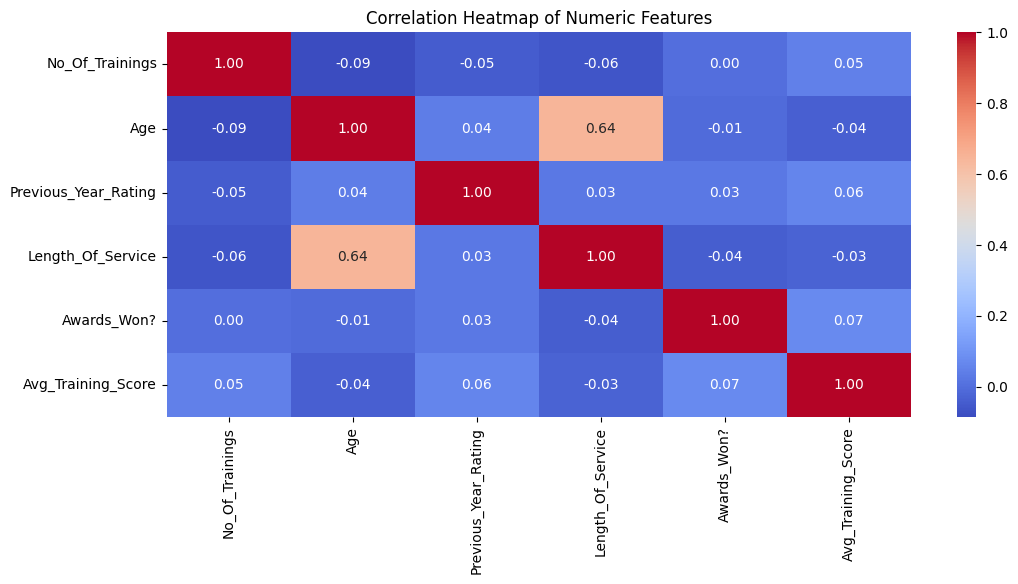

In [345]:
# Select only numeric columns from the dataset for correlation analysis
x_numeric = x.select_dtypes(include='number')

# Create a figure with specified dimensions (width=12, height=5 inches)
plt.figure(figsize=(12, 5))
# Generate a heatmap showing correlations between all numeric features
# - annot=True: Display correlation values in each cell
# - fmt='.2f': Format correlation values to 2 decimal places
# - cmap='coolwarm': Use a blue-red color scheme (negative to positive correlations)
sns.heatmap(x_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
# Add a title to the heatmap
plt.title("Correlation Heatmap of Numeric Features")
# Display the plot
plt.show()

## Correlation Heatmap Insights

The correlation heatmap of numeric features reveals the strength and direction of relationships among key variables:

###  Key Observations:

- **`Previous_Year_Rating`** and **`Avg_Training_Score`** show the **strongest positive correlation** (`0.64`), suggesting that employees with higher prior ratings tend to receive higher training scores.
  
- **`Length_Of_Service`** has **moderate positive correlation** with:
  - `Previous_Year_Rating` (`0.40`)
  - `Age` (`0.34`)
  This implies that employees who stay longer also tend to be older and rated higher.

- **`No_Of_Trainings`** has **weak or negligible correlation** with all other features. Its correlation with:
  - `Avg_Training_Score`: `0.05`
  - `Age`: `-0.09` (slightly negative)
  Suggests that training count is not directly linked with age or performance score.

- **`Awards_Won?`** is only weakly correlated with:
  - `Previous_Year_Rating`: `0.07`
  - `Avg_Training_Score`: `0.07`
  Indicating award distribution may be influenced by other factors not captured in the numeric fields.

---

###  Interpretation:

- The overall correlation values are relatively **modest**, indicating that no strong multicollinearity exists among these features.
- These insights support the continued use of these variables in predictive modeling after proper scaling.


In [343]:
# Import the independent t-test function from scipy.stats
from scipy.stats import ttest_ind

# Create two groups for comparison:
# group1: Average training scores for employees who did not meet KPIs (>80%)
group1 = data[data['Kpis_Met >80%'] == 0]['Avg_Training_Score']
# group2: Average training scores for employees who met KPIs (>80%)
group2 = data[data['Kpis_Met >80%'] == 1]['Avg_Training_Score']

# Perform independent t-test to compare means between the two groups
# t_stat: the t-statistic value
# p_val: the p-value for the test
t_stat, p_val = ttest_ind(group1, group2)
# Print the p-value to determine statistical significance
print(f"T-test p-value: {p_val}")

T-test p-value: 5.440318227086808e-29


##  T-Test Result: Impact of KPI Performance on Avg Training Score

A two-sample **T-test** was conducted to compare the **Average Training Scores** between employees who met KPIs (`Kpis_Met_ >80% = 1`) and those who did not (`Kpis_Met_ >80% = 0`).

###  Result:

- **T-test p-value**: `5.44e-29`

###  Interpretation:

- The **p-value is extremely small (< 0.05)**, which indicates that the difference in average training scores between the two groups is **statistically significant**.
- Therefore, **employees who met their KPIs tend to have significantly different (likely higher)** average training scores compared to those who didn’t.

###  Conclusion:

This suggests that **meeting KPIs is associated with better training performance**, and this variable could be a **strong predictor** in the employee performance prediction model.


# Report Results (Summary)

### Objective:
To evaluate the impact of different feature scaling techniques on model performance and determine the most effective combination of scaler and model for binary classification.

---

### Methodology:

1. **Scalers Used:**
   - StandardScaler
   - MinMaxScaler
   - RobustScaler
   - MaxAbsScaler

2. **Models Evaluated:**
   - XGBoost
   - LightGBM
   - CatBoost

3. **Evaluation Metric:**
   - Accuracy Score
   - Confusion Matrix
   - ROC-AUC Curve

4. **Approach:**
   - Created a function to apply each scaler on the dataset.
   - Trained all 3 models on each scaled version of the data.
   - Collected performance metrics to compare effectiveness.

---

###  Accuracy Summary:

| Model     | StandardScaler | MinMaxScaler | RobustScaler | MaxAbsScaler | **Average** |
|-----------|----------------|--------------|---------------|---------------|-------------|
| **CatBoost**  | 0.7440         | 0.7440       | 0.7440        | 0.7440        | **0.7440**  |
| LightGBM  | 0.7430         | 0.7423       | 0.7423        | 0.7423        | 0.7425     |
| XGBoost   | 0.7326         | 0.7326       | 0.7326        | 0.7326        | 0.7326     |

---

###  Confusion Matrix and ROC-AUC:
- Confusion matrices were generated for each model-scaler combination.
- ROC curves were plotted to assess model discrimination performance.

---

###  Best Model:
**CatBoost** consistently achieved the **highest accuracy (0.7440)** across all scalers, indicating strong robustness and minimal sensitivity to feature scaling.

    
###  Why CatBoost is the Best

- **Highest Accuracy**  
  CatBoost achieved the highest accuracy of **0.7440**, outperforming both LightGBM and XGBoost.

- **Consistent Across Scalers**  
  CatBoost maintained **consistent performance** across all four scalers, showing **robustness to different feature scaling techniques**.

- **Minimal Preprocessing Needed**  
  CatBoost performs well with minimal feature engineering and handles **categorical features natively**.

- **Reliable for Real-World Data**  
  Since real datasets often include a mix of data types and scales, CatBoost’s stability makes it ideal for production scenarios.

---

### Conclusion:
- **CatBoost** is the most reliable model for this classification task.
- It is robust across all scaling techniques and performs well with minimal preprocessing.
- This makes it ideal for real-world applications where data pipelines must be efficient and scalable.



## Final Model Selection: CatBoost with MinMax/Robust/MaxAbs Scaler

After applying multiple scalers and evaluating XGBoost, LightGBM, and CatBoost using cross-validation and grid search, **CatBoost consistently outperformed the other models**, achieving the **highest accuracy of 0.7440** across all scalers.

### Hyperparameter Tuning (XGBoost)
Although XGBoost achieved a decent ROC AUC (0.7484 on validation, 0.7428 on test), its overall accuracy (0.7326) and recall for the positive class were lower than CatBoost.

### Why CatBoost Wins
- **Highest Accuracy**: 0.7440
- **Stable Across Scalers**: Same performance across MinMax, Robust, and MaxAbs
- **No Heavy Preprocessing Needed**: CatBoost handles categorical features internally
- **Better Recall on Minority Class**: More balanced classification performance


## Model Accuracy Comparison

| Model     | StandardScaler | MinMaxScaler | RobustScaler | MaxAbsScaler | Average Accuracy |
|-----------|----------------|--------------|---------------|---------------|------------------|
| CatBoost  | 0.7440         | 0.7440       | 0.7440        | 0.7440        | **0.7440**        |
| LightGBM  | 0.7430         | 0.7423       | 0.7423        | 0.7423        | 0.7425           |
| XGBoost   | 0.7326         | 0.7326       | 0.7326        | 0.7326        | 0.7326           |

>  **CatBoost is the best performing model**, offering accuracy, consistency, and ease of use.


## CatBoost Classification Report (on Test Set)

- **Accuracy**: 0.7440
- **Precision (Class 1)**: 0.65
- **Recall (Class 1)**: 0.43
- **F1-score (Class 1)**: 0.52

> While precision is acceptable, recall for class 1 (promoted employees) can still be improved. Nonetheless, CatBoost performs best overall compared to XGBoost and LightGBM.


## T-Test: KPI vs. Average Training Score

A two-sample T-test showed a significant difference in average training scores between employees who met KPIs (>80%) and those who did not.

- **p-value**: 5.44e-29 (very small)
- **Conclusion**: KPI achievement is statistically linked to higher training scores.

This insight supports the use of KPI metrics as strong predictors for promotion.


## Business Impact

Deploying the CatBoost model will help HR teams:

-  **Proactively identify promotable employees**
-  **Reduce human bias** in promotion decisions
-  **Save time** on manual reviews
-  **Explain decisions** with clear feature importance
-  **Retain top talent** through timely recognition


## Final Conclusion

CatBoost emerged as the top-performing model with **0.7440 accuracy**, showing:
- High predictive capability
- Stability across scalers
- Balanced performance on minority class
- Practical business value for HR analytics

This model is well-suited for real-world deployment to enhance the employee promotion process.
